## Impact of Font Size
3 other dimensions

->Blur Level = 0

->Background Color = white

-> Word Counts = all 3

3 font sizes: 12, 18, 24

3 word counts: 40-60, 110-130, 180-200

for each word count: 

->3 font sizes




In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.translate.bleu_score import sentence_bleu



## Font Size Dataset Functions

In [39]:
# Function to filter data for font size analysis
def filter_font_size_data(df, base_blur_level, base_background_color, font_sizes, word_count_order):
    filtered_df = df[
        (df['Blur Level'] == base_blur_level) &
        (df['Background Color'] == base_background_color) &
        (df['Font Size'].isin(font_sizes)) &
        (df['Word Count Range'].isin(word_count_order))
    ]
    return filtered_df

# Function to analyze font size impact on WER
def analyze_font_size_impact(df, word_count_order, language_name):
    for word_count in word_count_order:
        # Filter data for the current word count
        wc_df = df[df['Word Count Range'] == word_count]
        
        # Calculate average WER for each font size
        avg_wer = wc_df.groupby('Font Size')['WER'].mean().reset_index()
        
        # Plotting
        plt.figure(figsize=(10, 6))
        plt.bar(avg_wer['Font Size'], avg_wer['WER'], width=1.5, color='skyblue', edgecolor='black')
        plt.title(f'Impact of Font Size on WER for Word Count {word_count} ({language_name})', fontsize=16)
        plt.xlabel('Font Size', fontsize=14)
        plt.ylabel('Average WER', fontsize=14)
        plt.xticks(avg_wer['Font Size'])
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()


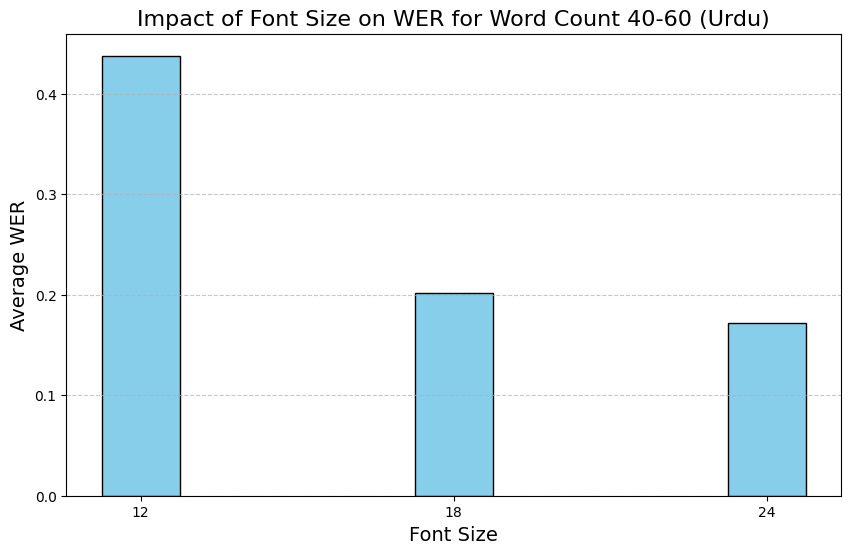

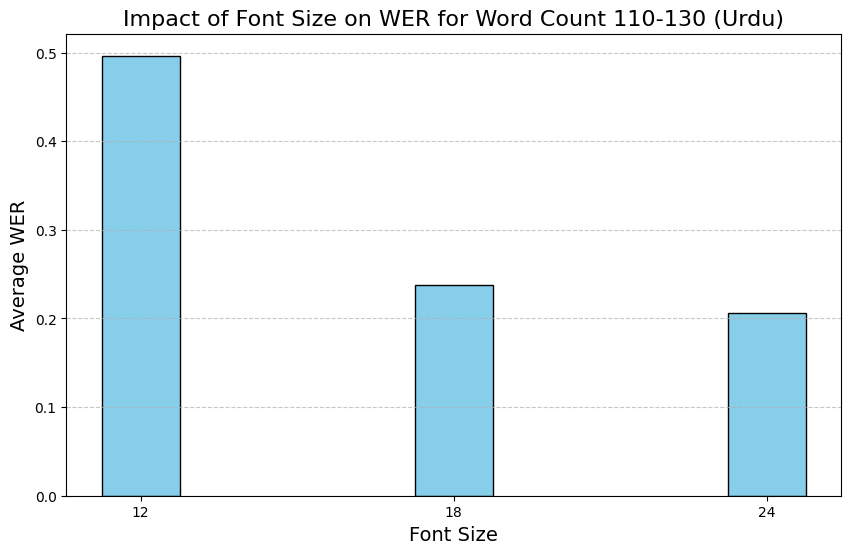

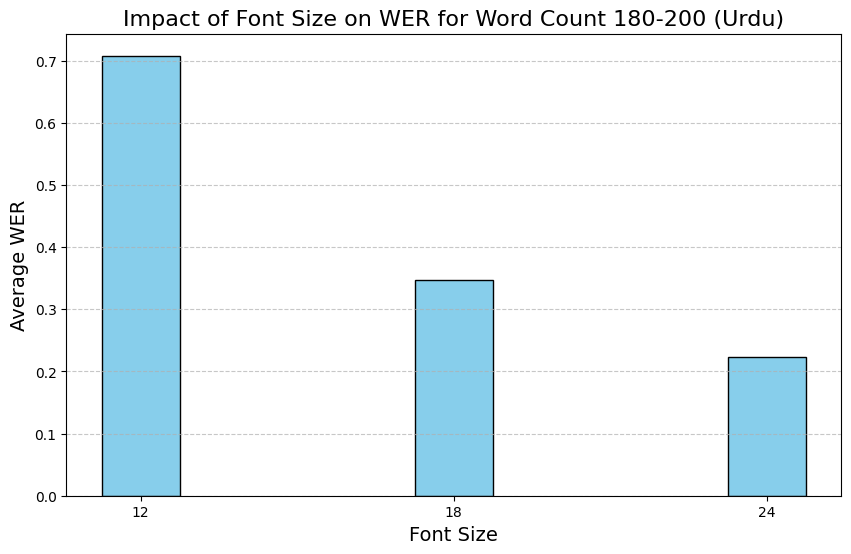

In [40]:
# File path
urdu_file_path = 'urdu_inferenced_dataset_with_metrics.csv'
urdu_df = pd.read_csv(urdu_file_path)

# Define filtering conditions
base_blur_level = 0
base_background_color = 'white'
font_sizes = [12, 18, 24]
word_count_order = ['40-60', '110-130', '180-200']

# Filter the data
filtered_urdu_df = filter_font_size_data(urdu_df, base_blur_level, base_background_color, font_sizes, word_count_order)

# Analyze font size impact on WER
analyze_font_size_impact(filtered_urdu_df, word_count_order, "Urdu")


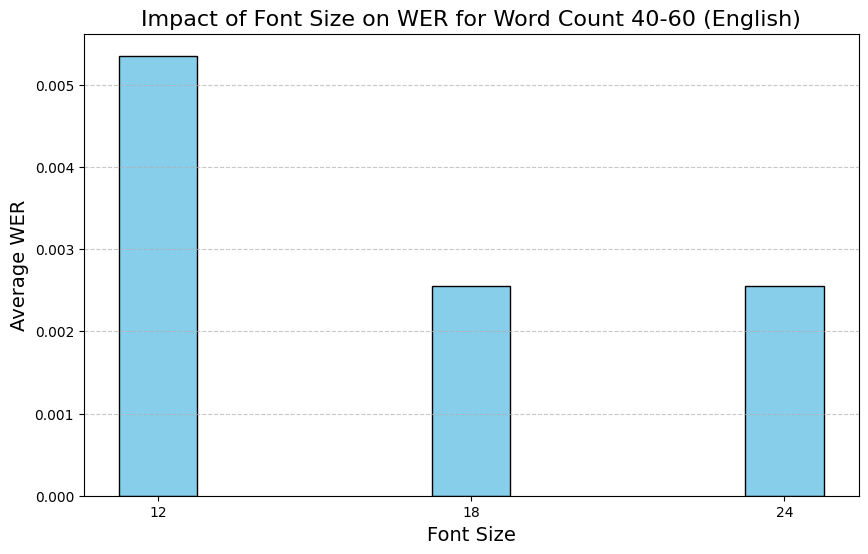

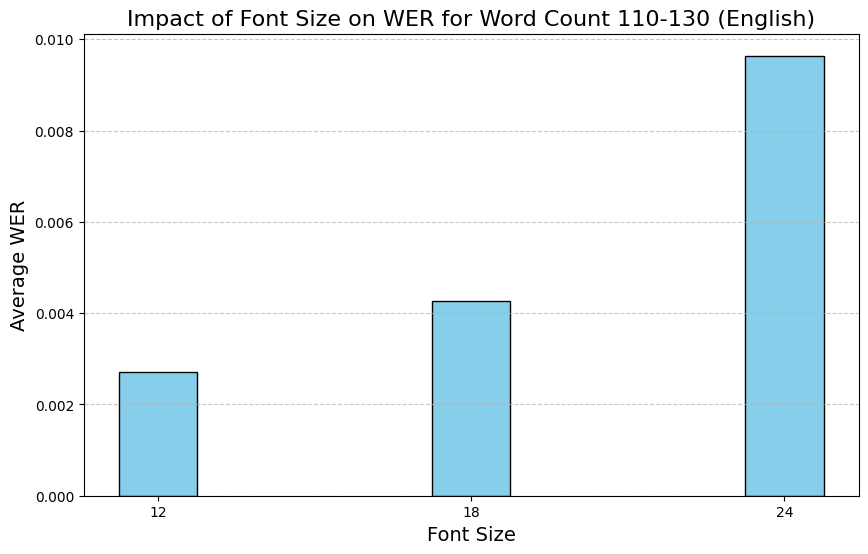

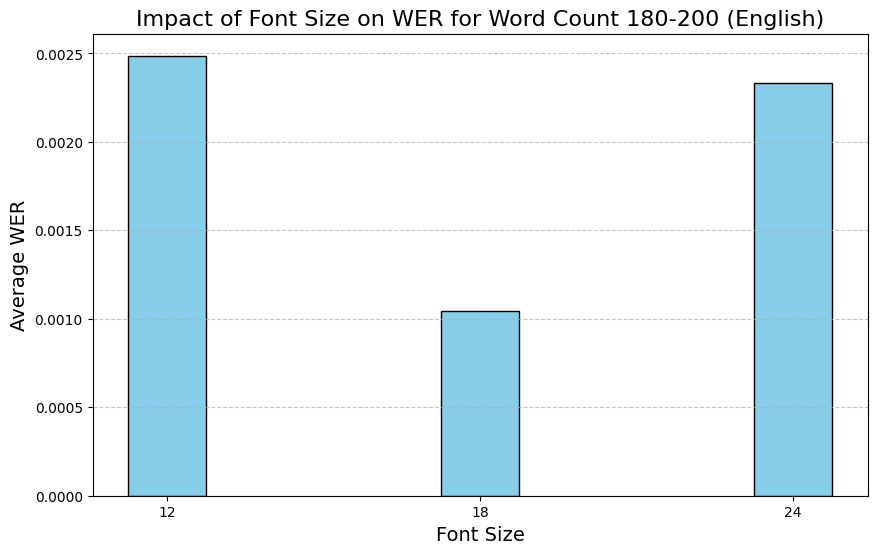

In [41]:
# File path
english_file_path = 'english_inferenced_dataset_with_metrics.csv'
english_df = pd.read_csv(english_file_path)

# Filter the data
filtered_english_df = filter_font_size_data(english_df, base_blur_level, base_background_color, font_sizes, word_count_order)

# Analyze font size impact on WER
analyze_font_size_impact(filtered_english_df, word_count_order, "English")


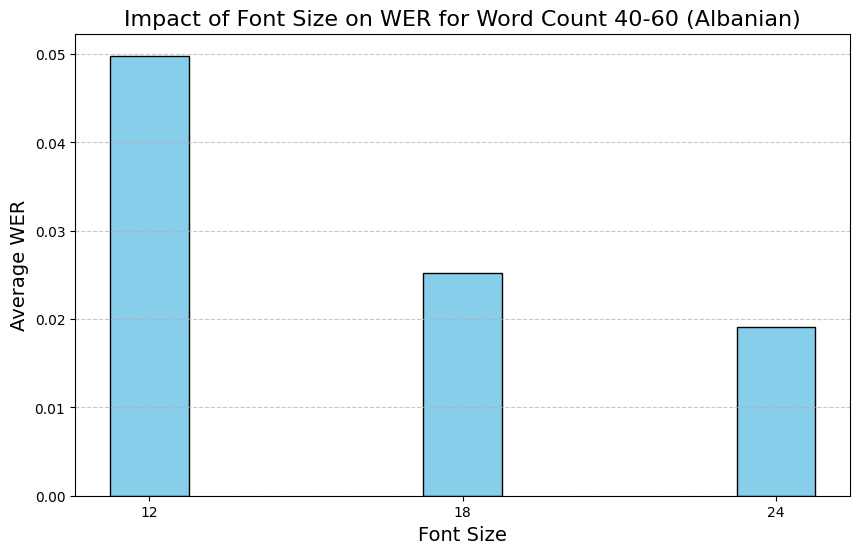

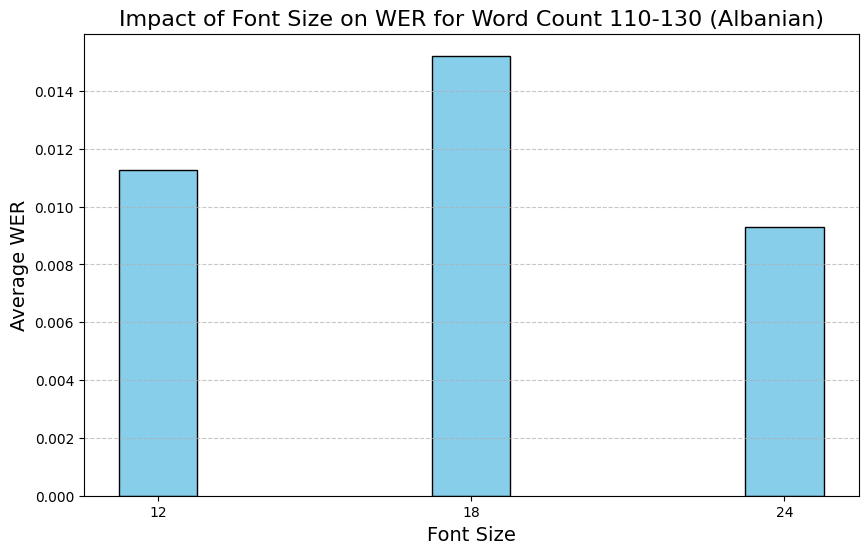

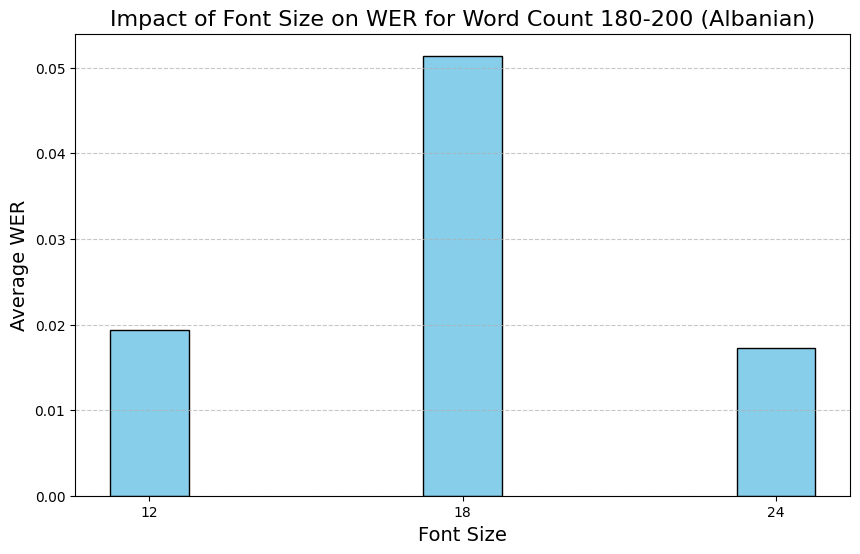

In [42]:
# File path
albanian_file_path = 'albanian_inferenced_dataset_with_metrics.csv'
albanian_df = pd.read_csv(albanian_file_path)

# Filter the data
filtered_albanian_df = filter_font_size_data(albanian_df, base_blur_level, base_background_color, font_sizes, word_count_order)

# Analyze font size impact on WER
analyze_font_size_impact(filtered_albanian_df, word_count_order, "Albanian")



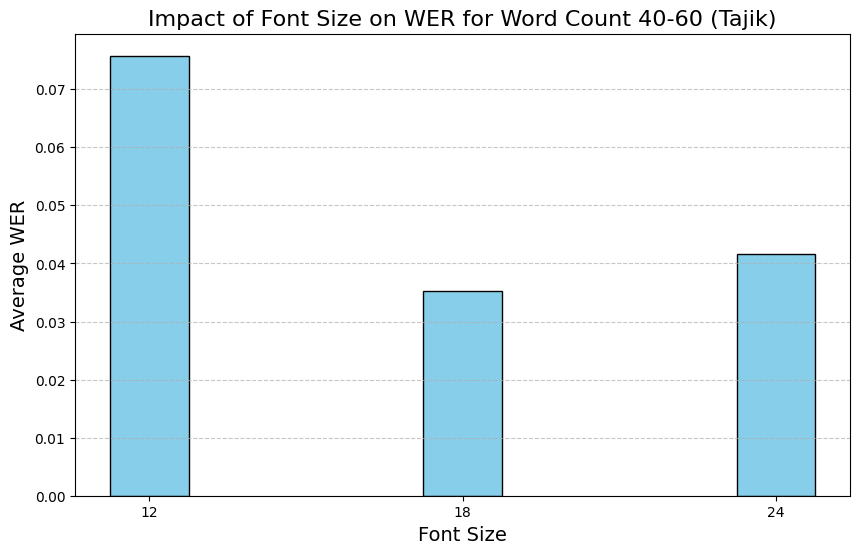

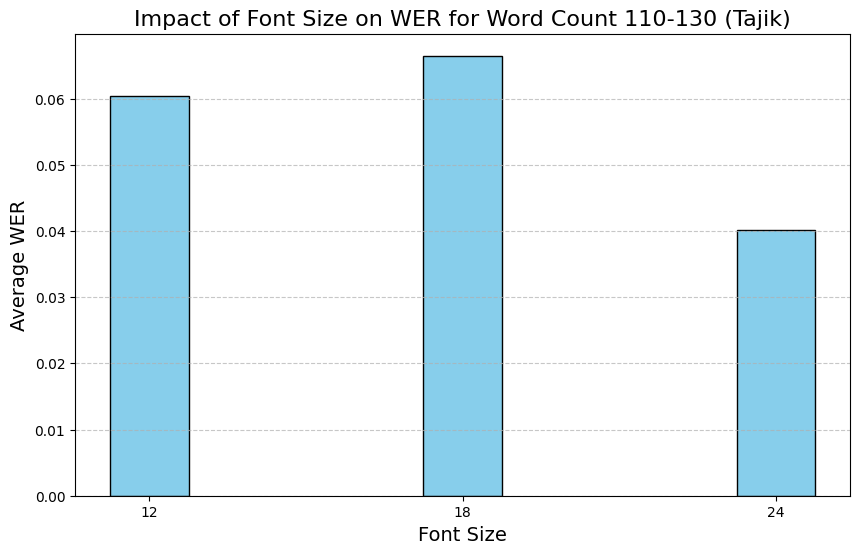

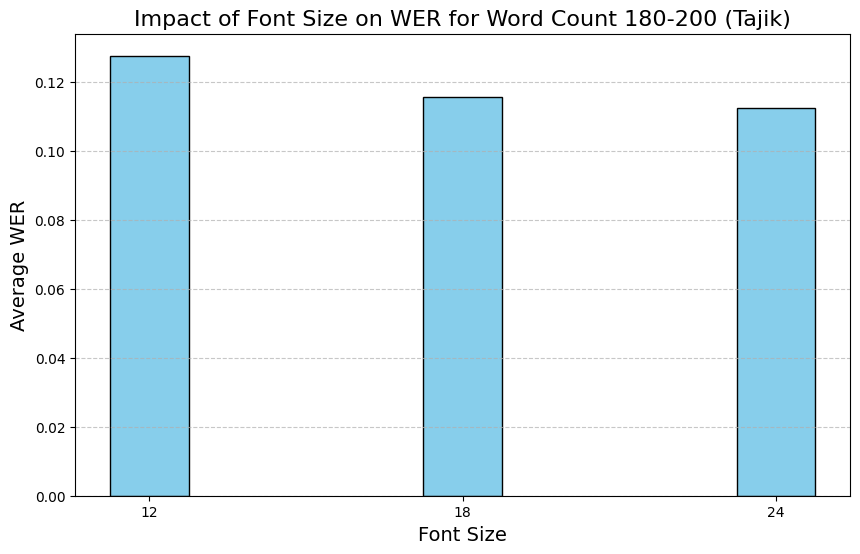

In [43]:
# File path
tajik_file_path = 'tajik_inferenced_dataset_with_metrics.csv'
tajik_df = pd.read_csv(tajik_file_path)

# Filter the data
filtered_tajik_df = filter_font_size_data(tajik_df, base_blur_level, base_background_color, font_sizes, word_count_order)

# Analyze font size impact on WER
analyze_font_size_impact(filtered_tajik_df, word_count_order, "Tajik")


## Combining Results

In [44]:
# Combine results from all languages into a single DataFrame for grouped bar plots
combined_results = []

# Helper function to append results to the combined list
def append_language_results(filtered_df, word_count_order, language_name):
    for word_count in word_count_order:
        wc_df = filtered_df[filtered_df['Word Count Range'] == word_count]
        avg_wer = wc_df.groupby('Font Size')['WER'].mean().reset_index()
        avg_wer['Language'] = language_name
        avg_wer['Word Count Range'] = word_count
        combined_results.append(avg_wer)

# Append results for all languages
append_language_results(filtered_urdu_df, word_count_order, "Urdu")
append_language_results(filtered_tajik_df, word_count_order, "Tajik")
append_language_results(filtered_albanian_df, word_count_order, "Albanian")
append_language_results(filtered_english_df, word_count_order, "English")


# Combine into a single DataFrame
combined_df = pd.concat(combined_results, ignore_index=True)
print("Combined results DataFrame created.")


Combined results DataFrame created.


## Grouped Bar Plots (All Word Counts Combined)

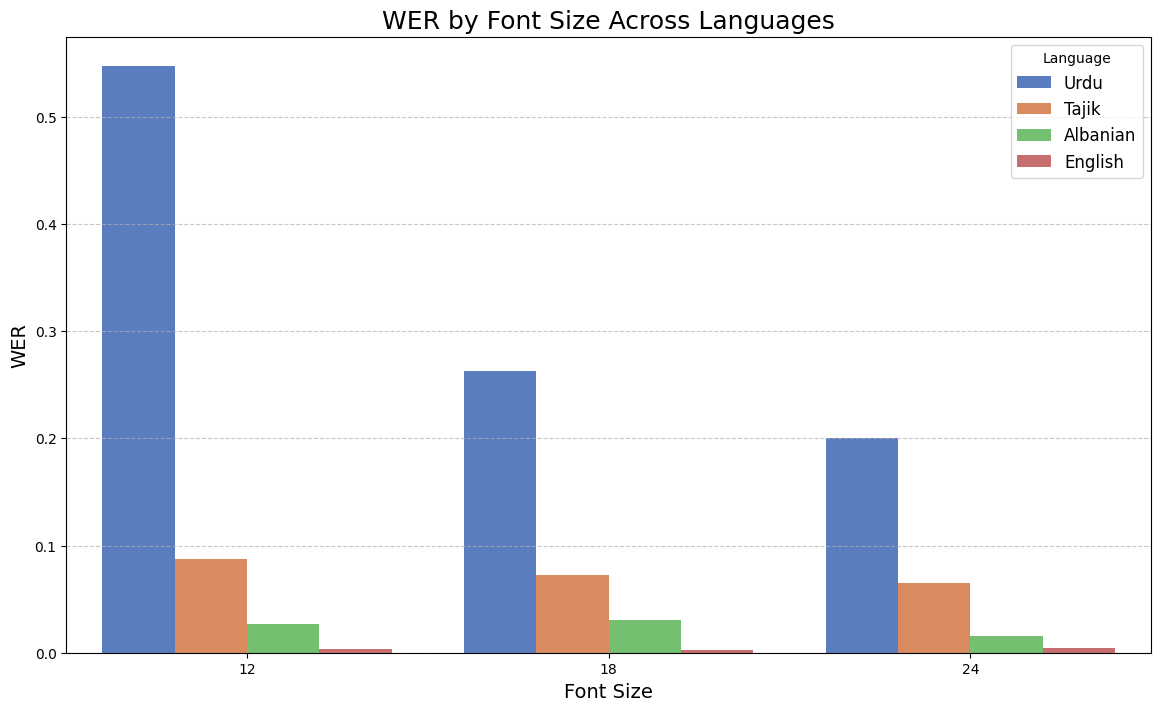

In [58]:
# Grouped bar plot: WER vs Font Size for each language
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(14, 8))
sns.barplot(data=combined_df, x='Font Size', y='WER', hue='Language', ci=None, palette='muted')
plt.title('WER by Font Size Across Languages', fontsize=18)
plt.xlabel('Font Size', fontsize=14)
plt.ylabel('WER', fontsize=14)
plt.legend(title='Language', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Grouped Bar Plots (For Each Word Count)

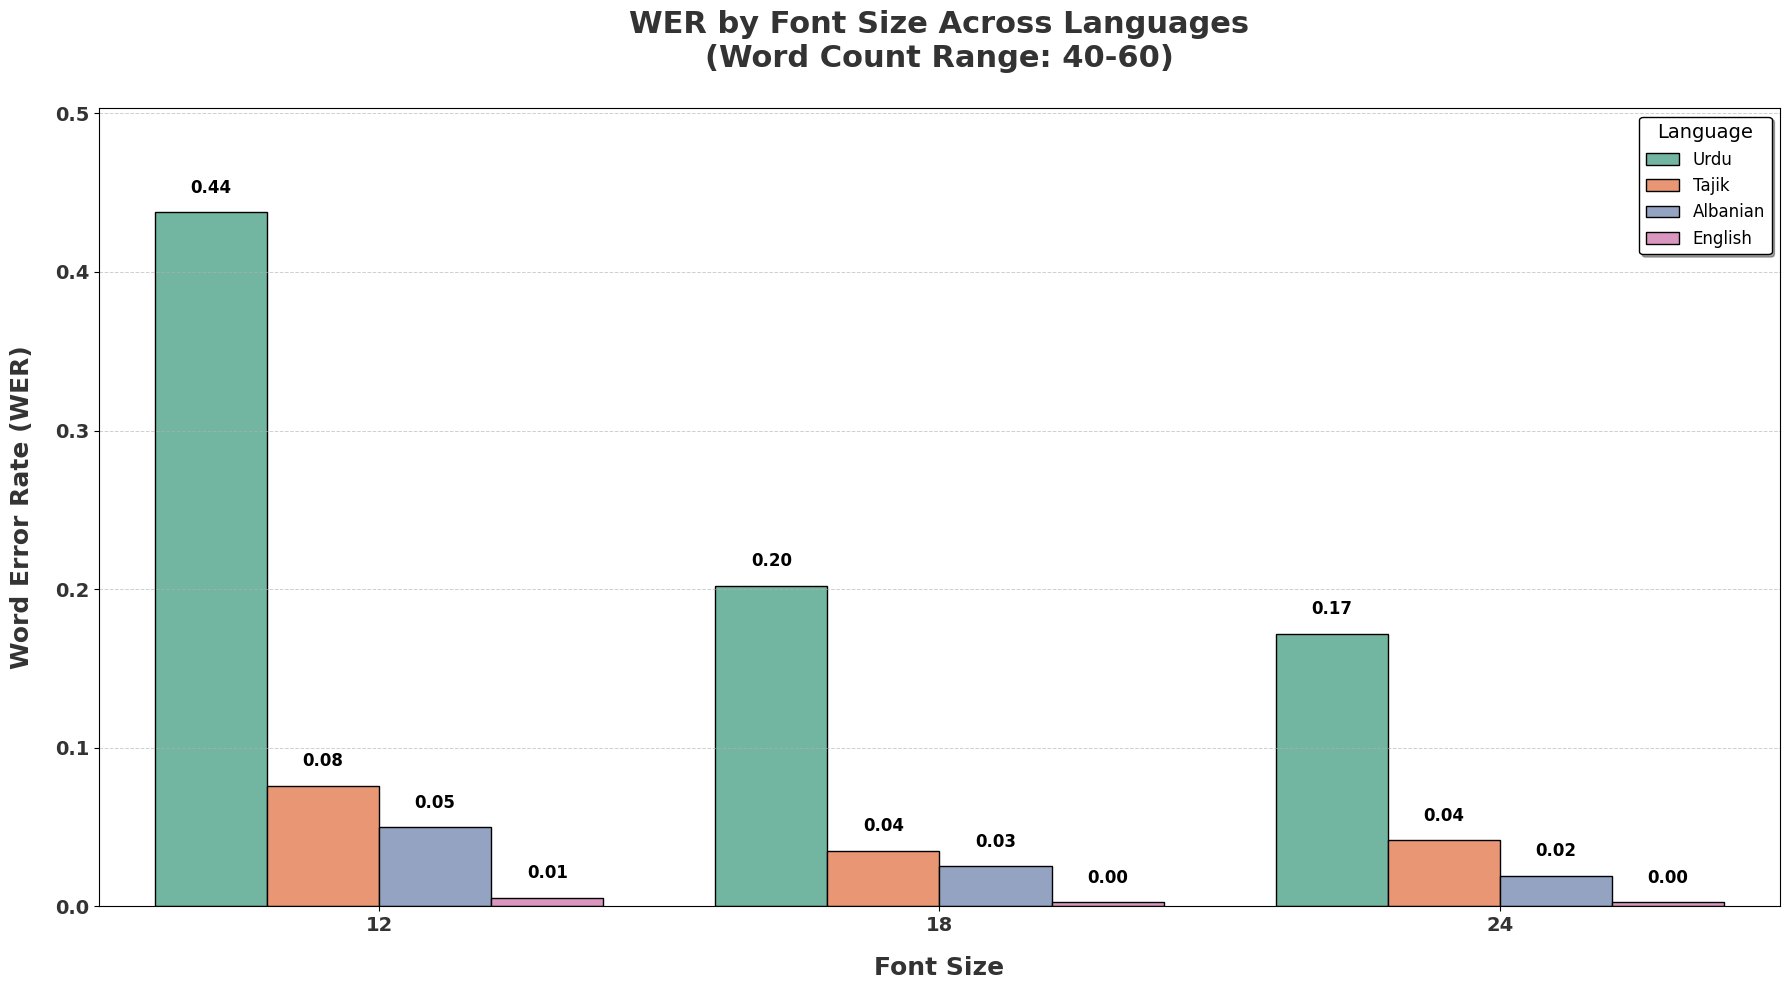

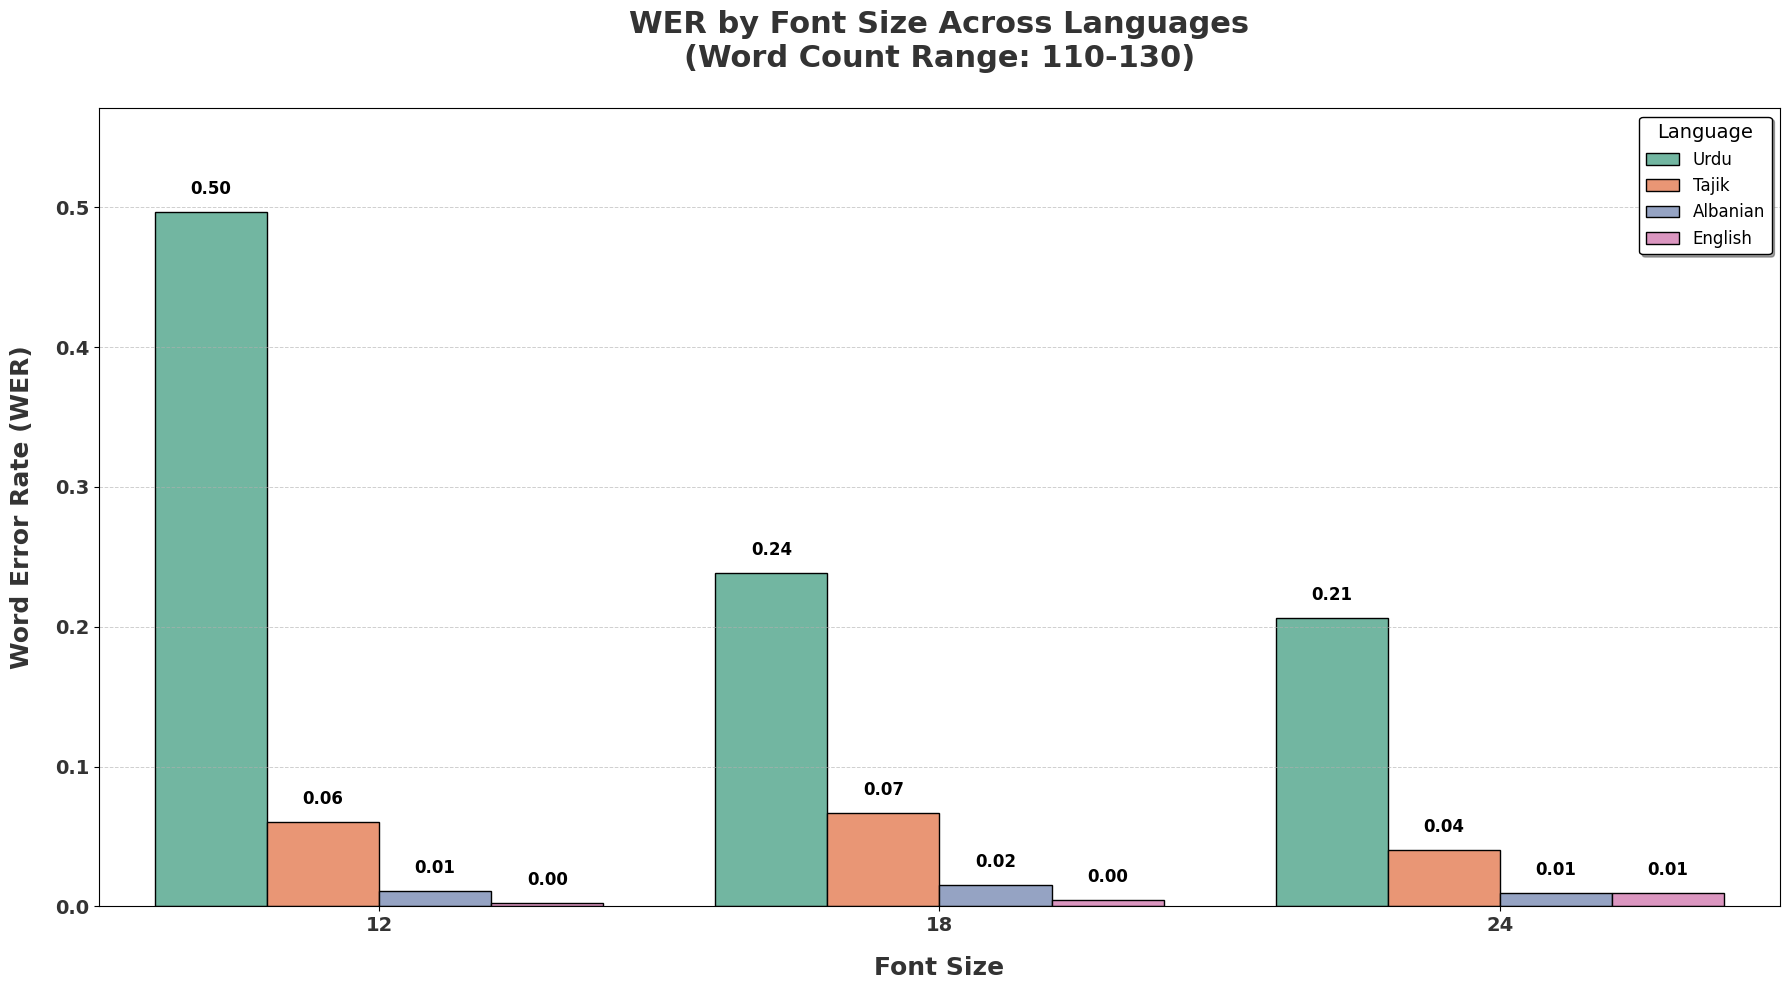

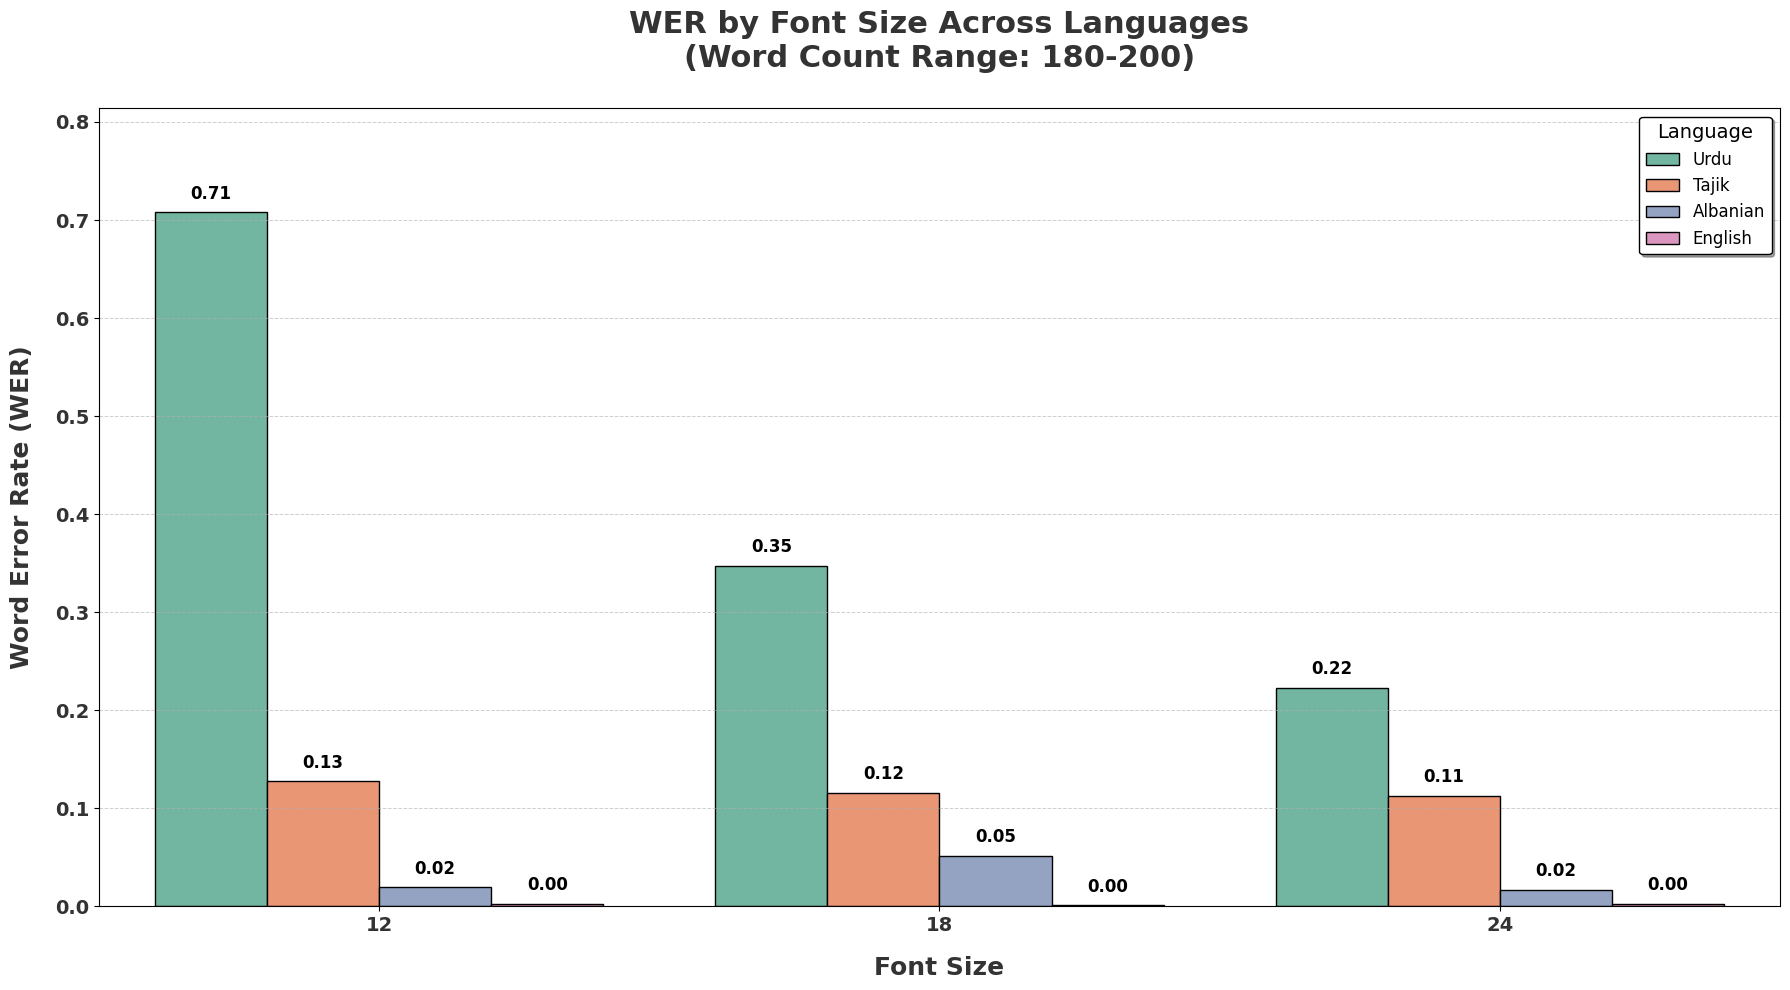

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# Super-Enhanced Grouped Bar Plot: WER vs Font Size for each language and word count
def plot_grouped_bar(df, word_count_order):
    for word_count in word_count_order:
        plt.figure(figsize=(18, 10))  # Larger figure size for better presentation
        
        # Filter data for the specific word count range
        wc_combined_df = df[df['Word Count Range'] == word_count]
        
        # Create the bar plot
        sns.barplot(
            data=wc_combined_df,
            x='Font Size',
            y='WER',
            hue='Language',
            ci=None,
            palette=sns.color_palette("Set2", len(wc_combined_df['Language'].unique())),  # Soft yet distinct colors
            edgecolor='black'  # Black edges for sharp bar outlines
        )
        
        for bar in plt.gca().patches:
            bar_height = bar.get_height()  # Height of the bar (WER value)
            bar_width = bar.get_width()    # Width of the bar
            bar_x = bar.get_x()            # X-coordinate of the bar
            
            # Ensure annotations are added only for visible bars
            if bar_height > 0 and bar_width > 0:
                plt.text(
                    bar_x + bar_width / 2,  # Center of the bar
                    bar_height + 0.01,      # Slightly above the bar
                    f'{bar_height:.2f}',    # Format annotation
                    ha='center',
                    va='bottom',
                    fontsize=12,
                    fontweight='bold',
                    color='black'
                )
        
        # Customize the title and axis labels
        plt.title(
            f'WER by Font Size Across Languages\n(Word Count Range: {word_count})',
            fontsize=22,
            fontweight='bold',
            pad=30,
            color='#333333'
        )
        plt.xlabel('Font Size', fontsize=18, labelpad=15, fontweight='bold', color='#333333')
        plt.ylabel('Word Error Rate (WER)', fontsize=18, labelpad=15, fontweight='bold', color='#333333')
        
        # Customize the legend
        plt.legend(
            title='Language',
            title_fontsize=14,
            fontsize=12,
            loc='upper right',
            frameon=True,
            facecolor='white',
            edgecolor='black',
            fancybox=True,  # Rounded corners
            shadow=True  # Add shadow for emphasis
        )
        
        # Add gridlines with a clean look
        plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)
        
        # Beautify x-axis and y-axis tick labels
        plt.xticks(fontsize=14, fontweight='bold', color='#333333')
        plt.yticks(fontsize=14, fontweight='bold', color='#333333')
        
        # Adjust y-axis limits to create visual balance
        plt.ylim(0, wc_combined_df['WER'].max() * 1.15)  # Add extra space above the bars
        
        # Use tight layout to ensure no clipping
        plt.tight_layout()
        
        # Show the plot
        plt.show()

# Call the function with the dataset and word count order
plot_grouped_bar(combined_df, word_count_order)


## Line Plots (For Each Word Count)

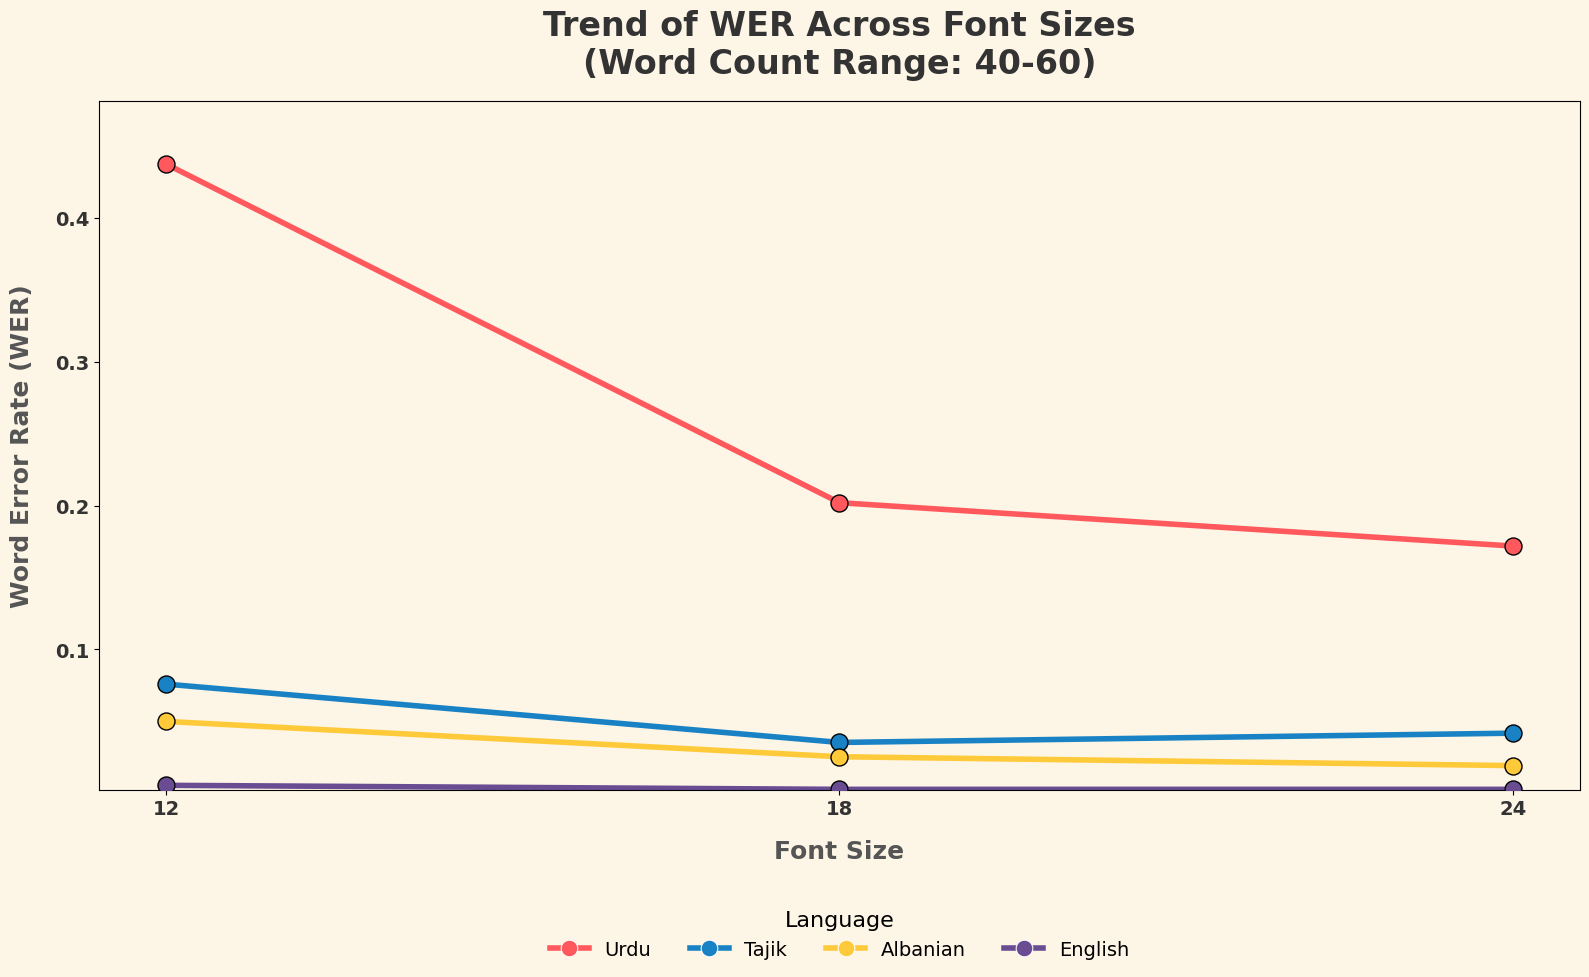

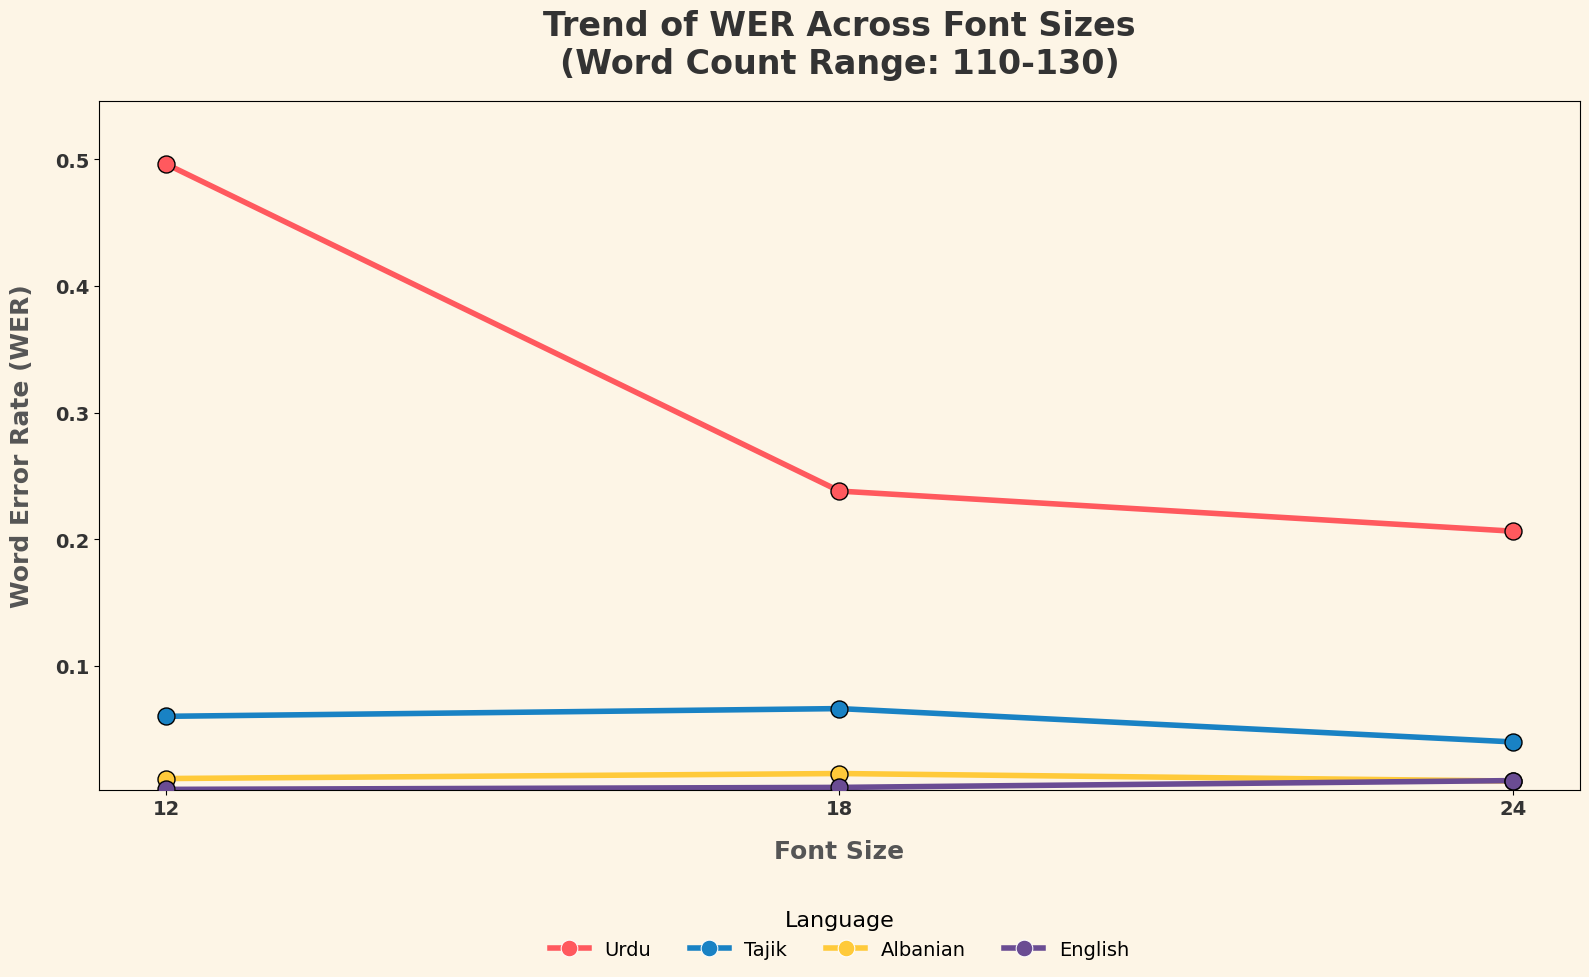

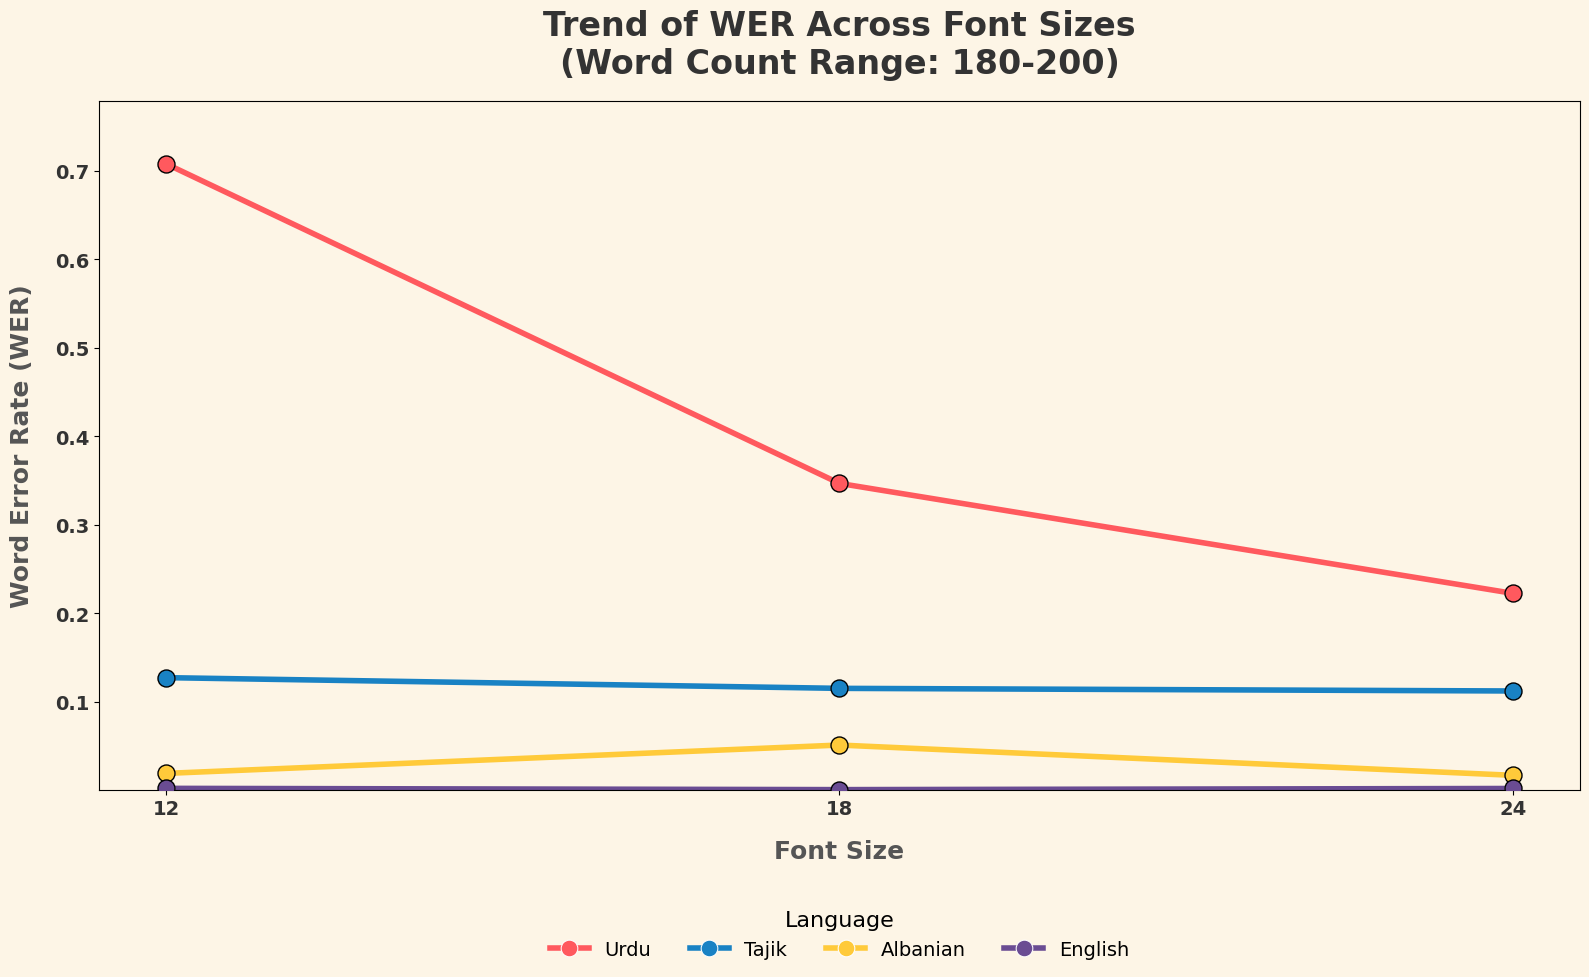

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

# Enhanced Line Plot for WER Trends in Infographic Style with Thick, Bright Lines
def plot_line_wer_infographic(df, word_count_order):
    for word_count in word_count_order:
        plt.figure(figsize=(16, 10))  # Larger figure for infographic presentation

        # Filter data for the specific word count range
        wc_combined_df = df[df['Word Count Range'] == word_count]

        # Create the line plot
        sns.lineplot(
            data=wc_combined_df,
            x='Font Size',
            y='WER',
            hue='Language',
            marker='o',
            palette=['#FF595E', '#1982C4', '#FFCA3A', '#6A4C93'],  # Vibrant and distinct colors
            linewidth=4,  # Thicker lines
            markersize=12  # Larger markers
        )

        # Customize title and labels
        plt.title(
            f'Trend of WER Across Font Sizes\n(Word Count Range: {word_count})',
            fontsize=24,
            fontweight='bold',
            color='#333333',
            pad=20
        )
        plt.xlabel('Font Size', fontsize=18, labelpad=15, fontweight='bold', color='#555555')
        plt.ylabel('Word Error Rate (WER)', fontsize=18, labelpad=15, fontweight='bold', color='#555555')

        # Enhance legend
        plt.legend(
            title='Language',
            title_fontsize=16,
            fontsize=14,
            loc='upper center',
            bbox_to_anchor=(0.5, -0.15),  # Place below the plot
            frameon=False,
            ncol=4  # Arrange in a single row
        )

        # Remove gridlines for a cleaner look
        plt.grid(False)

        # Customize the background
        plt.gca().set_facecolor('#FDF5E6')  # Light beige background
        plt.gcf().patch.set_facecolor('#FDF5E6')  # Match figure background

        # Add markers for each point with a contrasting black edge
        for line in plt.gca().lines:
            x_data, y_data = line.get_xdata(), line.get_ydata()
            plt.scatter(
                x_data, y_data,
                color=line.get_color(),
                s=150,  # Larger marker size for infographic look
                edgecolor='black',
                zorder=3
            )

        # Dynamically scale the y-axis to fit the data properly
        y_min = wc_combined_df['WER'].min() * 0.9  # Add a small buffer below the minimum
        y_max = wc_combined_df['WER'].max() * 1.1  # Add a small buffer above the maximum
        plt.ylim(y_min, y_max)

        # Set specific x-axis ticks
        plt.xticks(ticks=[12, 18, 24], labels=['12', '18', '24'], fontsize=14, fontweight='bold', color='#333333')
        plt.yticks(fontsize=14, fontweight='bold', color='#333333')

        plt.tight_layout()
        plt.show()

# Call the function for WER trends
plot_line_wer_infographic(combined_df, word_count_order)


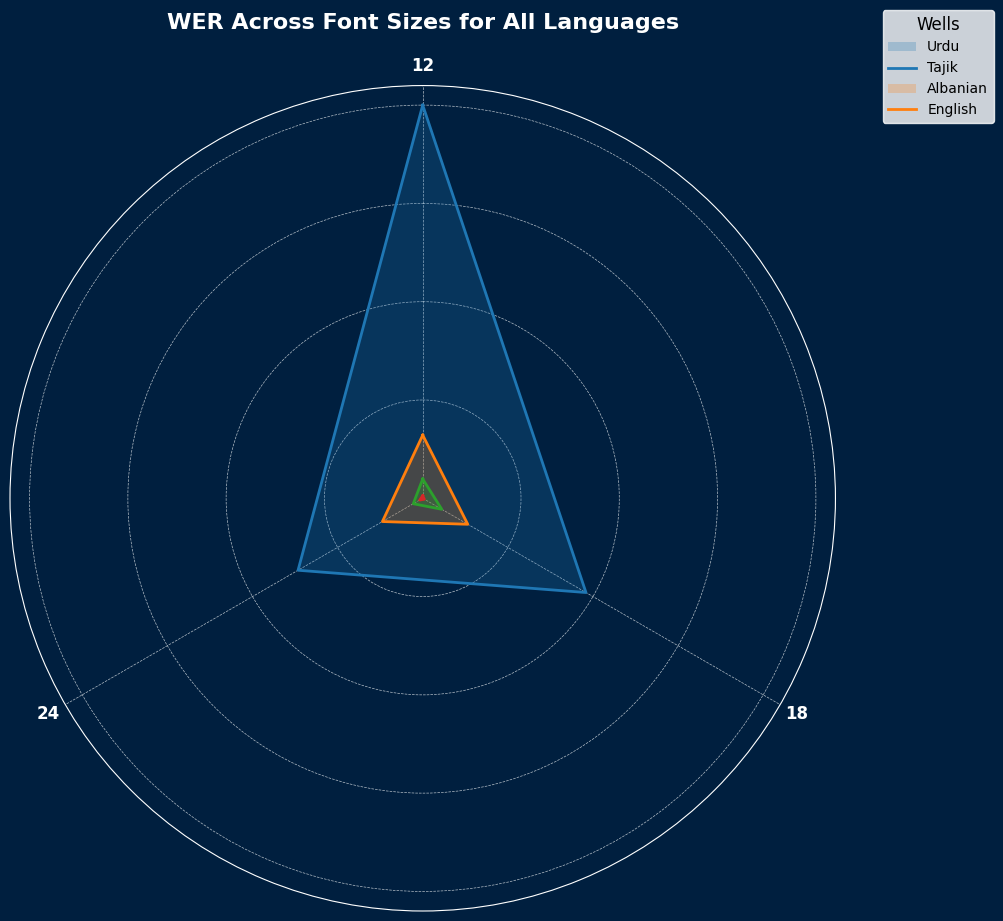

In [104]:
from math import pi
from matplotlib.colors import to_rgba
import matplotlib.pyplot as plt
import numpy as np

# Enhanced radar plot with the desired style
def plot_radar(data, title):
    categories = list(data['Metric'])
    num_vars = len(categories)

    # Create figure and axis
    fig = plt.figure(figsize=(10, 10), facecolor='#001f3f')  # Dark blue figure background
    ax = fig.add_subplot(111, polar=True)

    # Create the angle for each category
    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += angles[:1]  # Complete the circle

    # Define colormap and transparency
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Vibrant colors
    fill_colors = [to_rgba(c, alpha=0.25) for c in colors]  # Transparent fills

    # Draw radar chart for each language
    for i, language in enumerate(data.columns[:-1]):  # Exclude 'Metric'
        values = data[language].tolist()
        values += values[:1]  # Complete the circle

        # Add transparent fill
        ax.fill(angles, values, color=fill_colors[i], edgecolor='none', zorder=2)
        # Add bold outline
        ax.plot(angles, values, linewidth=2, color=colors[i], zorder=3, label=language)

    # Add gridlines and radial settings
    ax.set_facecolor('#001f3f')  # Match axis background to the figure
    ax.grid(color='#ffffff', linestyle='--', linewidth=0.5, alpha=0.7)  # Thin white grid lines
    ax.set_theta_offset(pi / 2)  # Rotate start angle to top
    ax.set_theta_direction(-1)  # Clockwise layout

    # Configure category labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=12, color='white', fontweight='bold')

    # Add radial lines and limits
    ax.set_yticks(np.linspace(0, max(data.iloc[:, :-1].max()), 5))
    ax.set_yticklabels([], color='white')  # Hide radial labels
    for spine in ax.spines.values():
        spine.set_edgecolor('white')

    # Add title
    ax.set_title(title, size=16, pad=20, color='white', fontweight='bold')

    # Add a legend
    ax.legend(data.columns[:-1], loc='upper right', bbox_to_anchor=(1.2, 1.1), fontsize=10, title="Wells",
              title_fontsize=12, facecolor='white', edgecolor='white', labelspacing=0.5)

    plt.tight_layout()
    plt.show()

# Radar plot with the specified style
plot_radar(radar_df, 'WER Across Font Sizes for All Languages')


## BLEU Scores

In [62]:
# Function to calculate BLEU score for a dataset
def calculate_bleu(df):
    bleu_scores = []
    for _, row in df.iterrows():
        reference = [str(row['Gold Label']).split()]  # Tokenized reference (ground truth)
        hypothesis = str(row['Response']).split()    # Tokenized hypothesis (OCR output)
        bleu = sentence_bleu(reference, hypothesis)
        bleu_scores.append(bleu)
    df['BLEU'] = bleu_scores
    return df


# Calculate BLEU for each dataset
urdu_bleu_df = calculate_bleu(filtered_urdu_df)
english_bleu_df = calculate_bleu(filtered_english_df)
tajik_bleu_df = calculate_bleu(filtered_tajik_df)
albanian_bleu_df = calculate_bleu(filtered_albanian_df)

# Combine BLEU results for grouped analysis
bleu_combined_results = []

def append_bleu_results_font_size(df, word_count_order, language_name):
    for word_count in word_count_order:
        wc_df = df[df['Word Count Range'] == word_count]
        avg_bleu = wc_df.groupby('Font Size')['BLEU'].mean().reset_index()
        avg_bleu['Language'] = language_name
        avg_bleu['Word Count Range'] = word_count
        bleu_combined_results.append(avg_bleu)

# Append BLEU results for all languages
append_bleu_results_font_size(urdu_bleu_df, word_count_order, "Urdu")
append_bleu_results_font_size(tajik_bleu_df, word_count_order, "Tajik")
append_bleu_results_font_size(albanian_bleu_df, word_count_order, "Albanian")
append_bleu_results_font_size(english_bleu_df, word_count_order, "English")


# Combine BLEU results into a single DataFrame
bleu_combined_df = pd.concat(bleu_combined_results, ignore_index=True)
print("Combined BLEU results DataFrame created.")





Combined BLEU results DataFrame created.


## BLEU Score Grouped Bar Plots

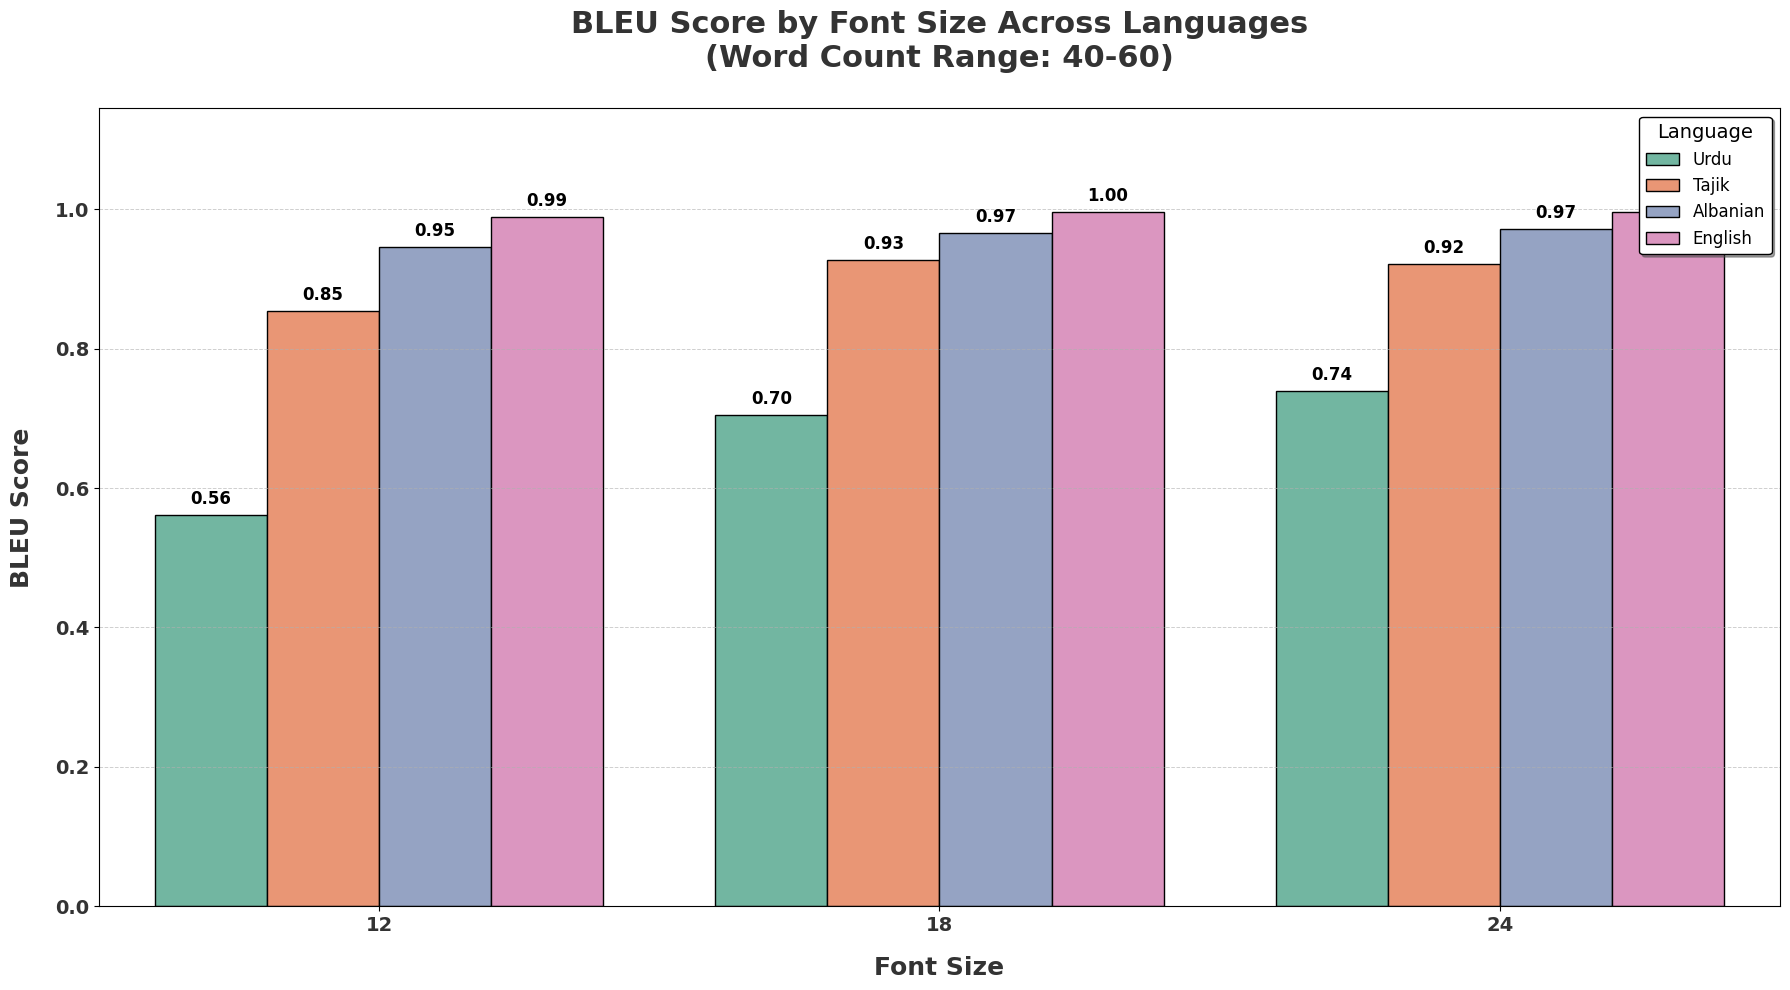

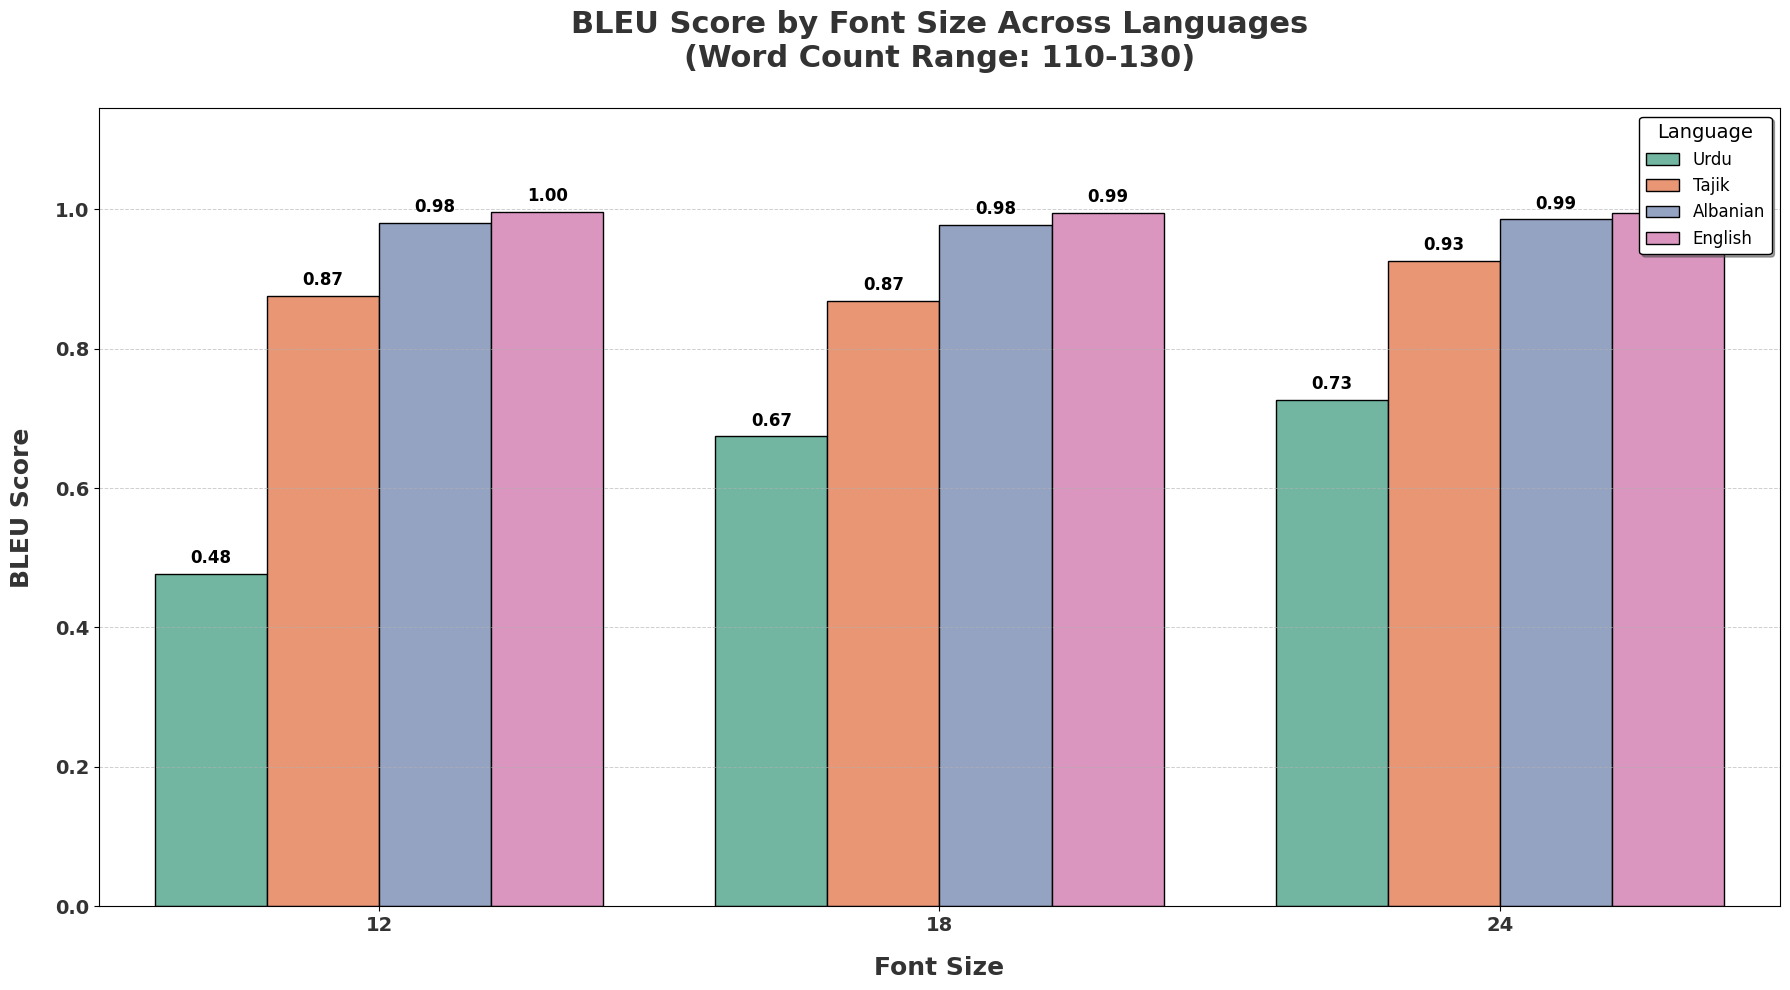

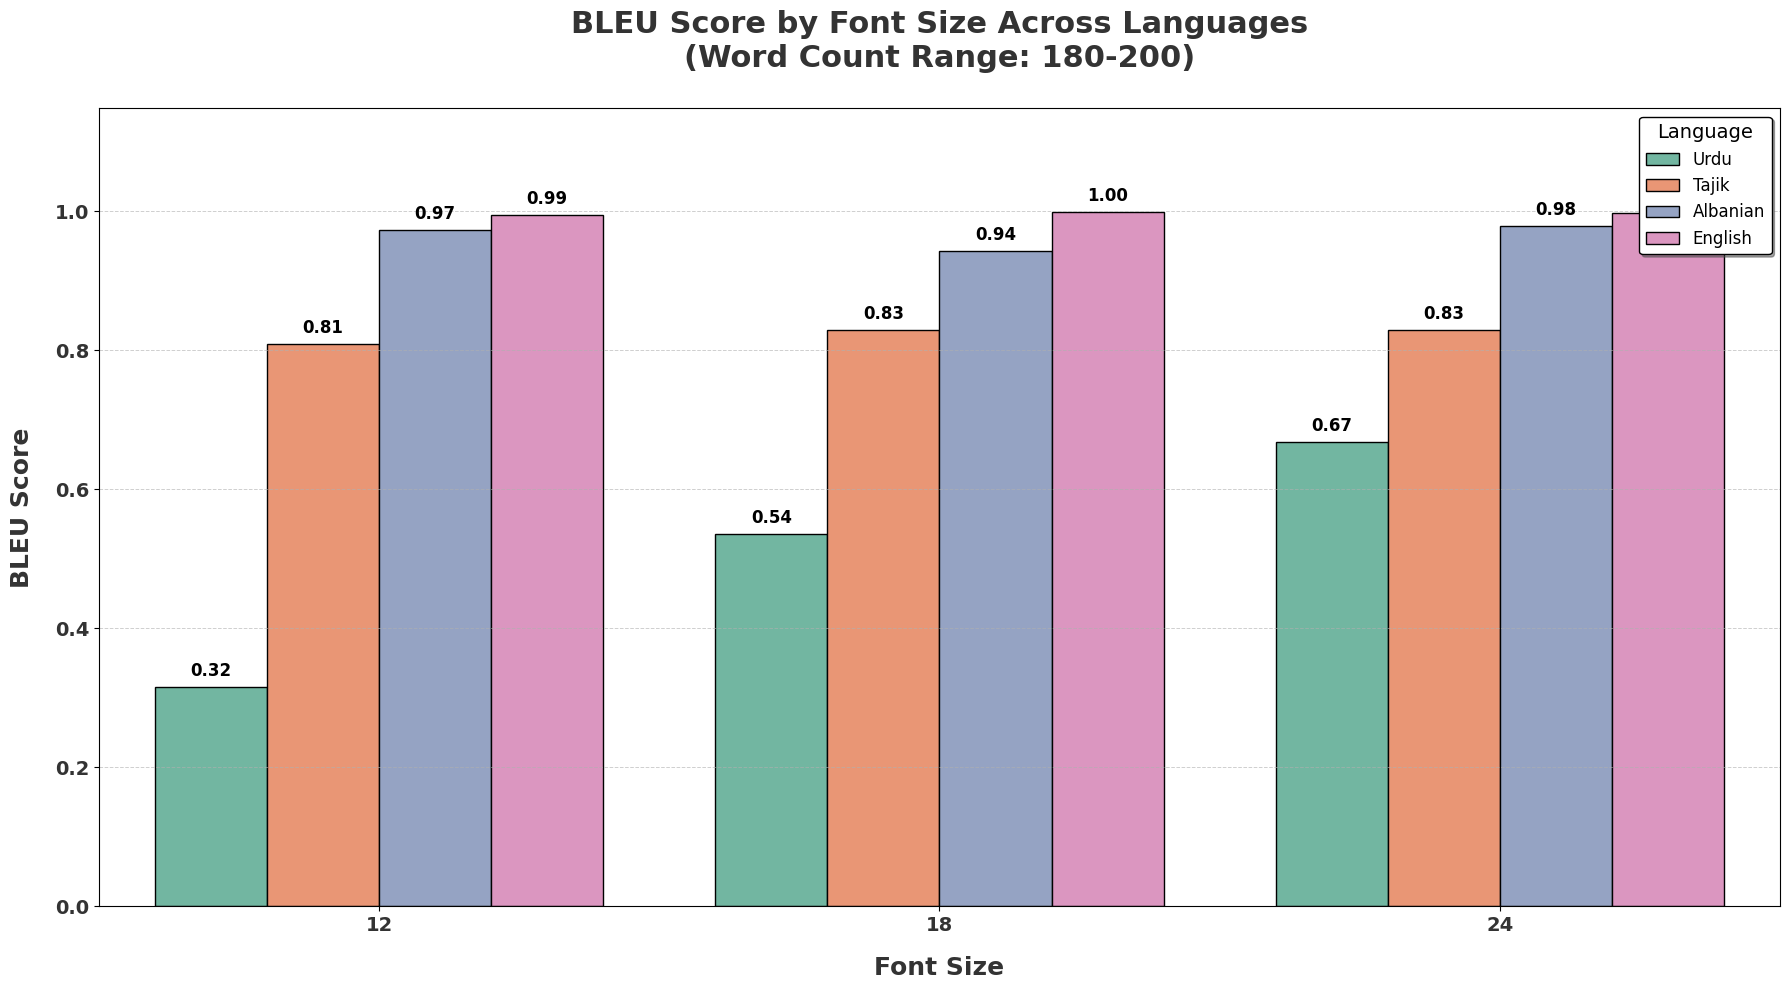

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

# Enhanced Grouped Bar Plot for BLEU Scores
def plot_grouped_bar_bleu(df, word_count_order):
    for word_count in word_count_order:
        plt.figure(figsize=(18, 10))  # Larger figure size for better presentation
        
        # Filter data for the specific word count range
        wc_bleu_combined_df = df[df['Word Count Range'] == word_count]
        
        # Create the bar plot
        sns.barplot(
            data=wc_bleu_combined_df,
            x='Font Size',
            y='BLEU',
            hue='Language',
            ci=None,
            palette=sns.color_palette("Set2", len(wc_bleu_combined_df['Language'].unique())),  # Soft yet distinct colors
            edgecolor='black'  # Black edges for sharp bar outlines
        )
        
        # Add annotations above each bar
        for bar in plt.gca().patches:
            bar_height = bar.get_height()  # Height of the bar (BLEU score)
            bar_width = bar.get_width()    # Width of the bar
            bar_x = bar.get_x()            # X-coordinate of the bar
            
            # Ensure annotations are added only for visible bars
            if bar_height > 0 and bar_width > 0:
                plt.text(
                    bar_x + bar_width / 2,  # Center of the bar
                    bar_height + 0.01,      # Slightly above the bar
                    f'{bar_height:.2f}',    # Format annotation
                    ha='center',
                    va='bottom',
                    fontsize=12,
                    fontweight='bold',
                    color='black'
                )
        
        # Customize the title and axis labels
        plt.title(
            f'BLEU Score by Font Size Across Languages\n(Word Count Range: {word_count})',
            fontsize=22,
            fontweight='bold',
            pad=30,
            color='#333333'
        )
        plt.xlabel('Font Size', fontsize=18, labelpad=15, fontweight='bold', color='#333333')
        plt.ylabel('BLEU Score', fontsize=18, labelpad=15, fontweight='bold', color='#333333')
        
        # Customize the legend
        plt.legend(
            title='Language',
            title_fontsize=14,
            fontsize=12,
            loc='upper right',
            frameon=True,
            facecolor='white',
            edgecolor='black',
            fancybox=True,  # Rounded corners
            shadow=True  # Add shadow for emphasis
        )
        
        # Add gridlines with a clean look
        plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)
        
        # Beautify x-axis and y-axis tick labels
        plt.xticks(fontsize=14, fontweight='bold', color='#333333')
        plt.yticks(fontsize=14, fontweight='bold', color='#333333')
        
        # Adjust y-axis limits to create visual balance
        plt.ylim(0, wc_bleu_combined_df['BLEU'].max() * 1.15)  # Add extra space above the bars
        
        # Use tight layout to ensure no clipping
        plt.tight_layout()
        
        # Show the plot
        plt.show()

# Call the function with the dataset and word count order
plot_grouped_bar_bleu(bleu_combined_df, word_count_order)


## BLEU Score HeatMap

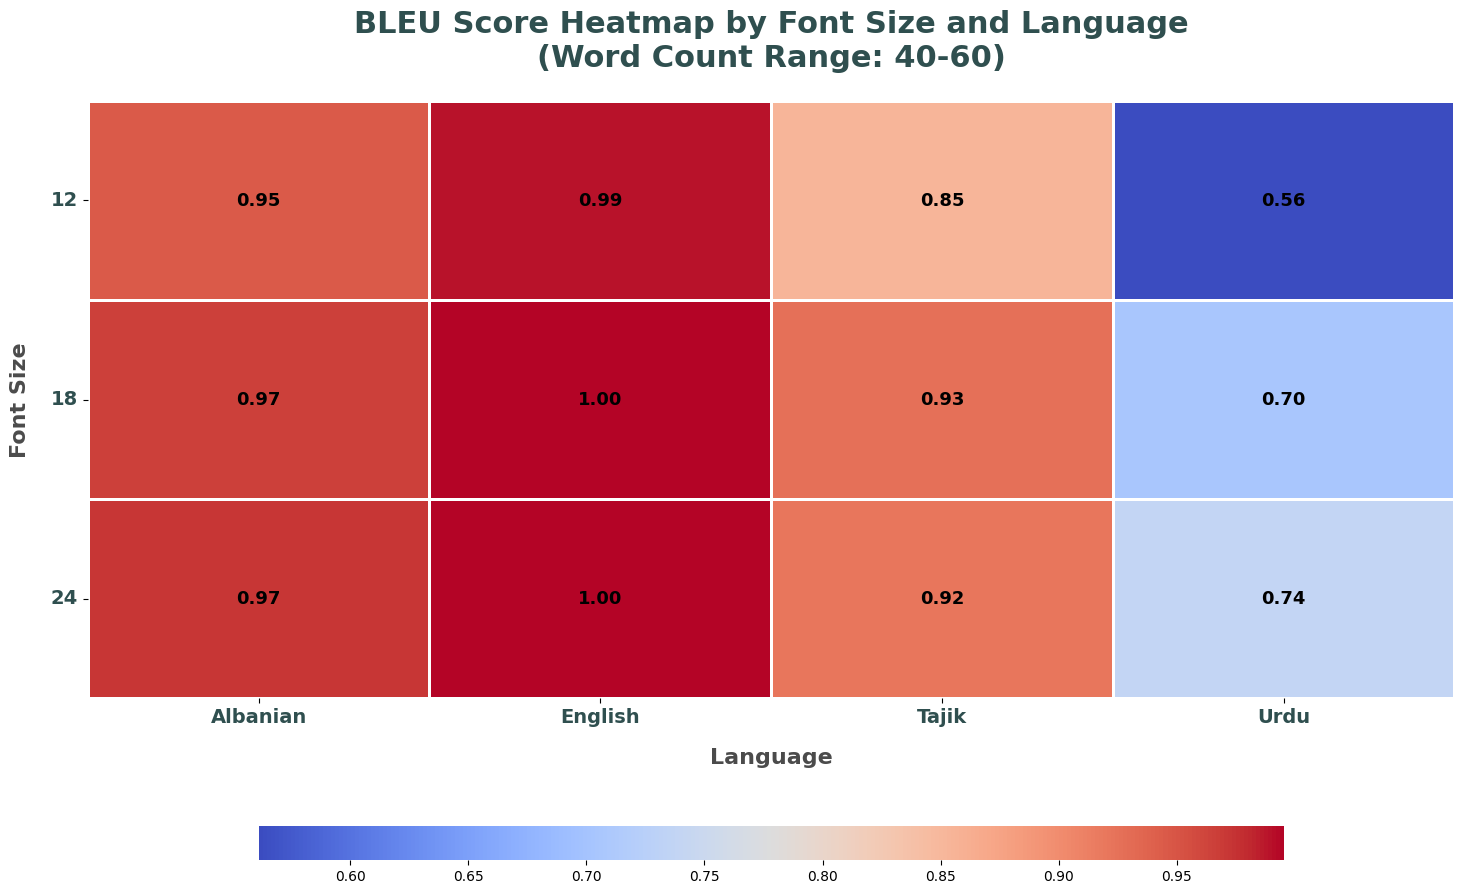

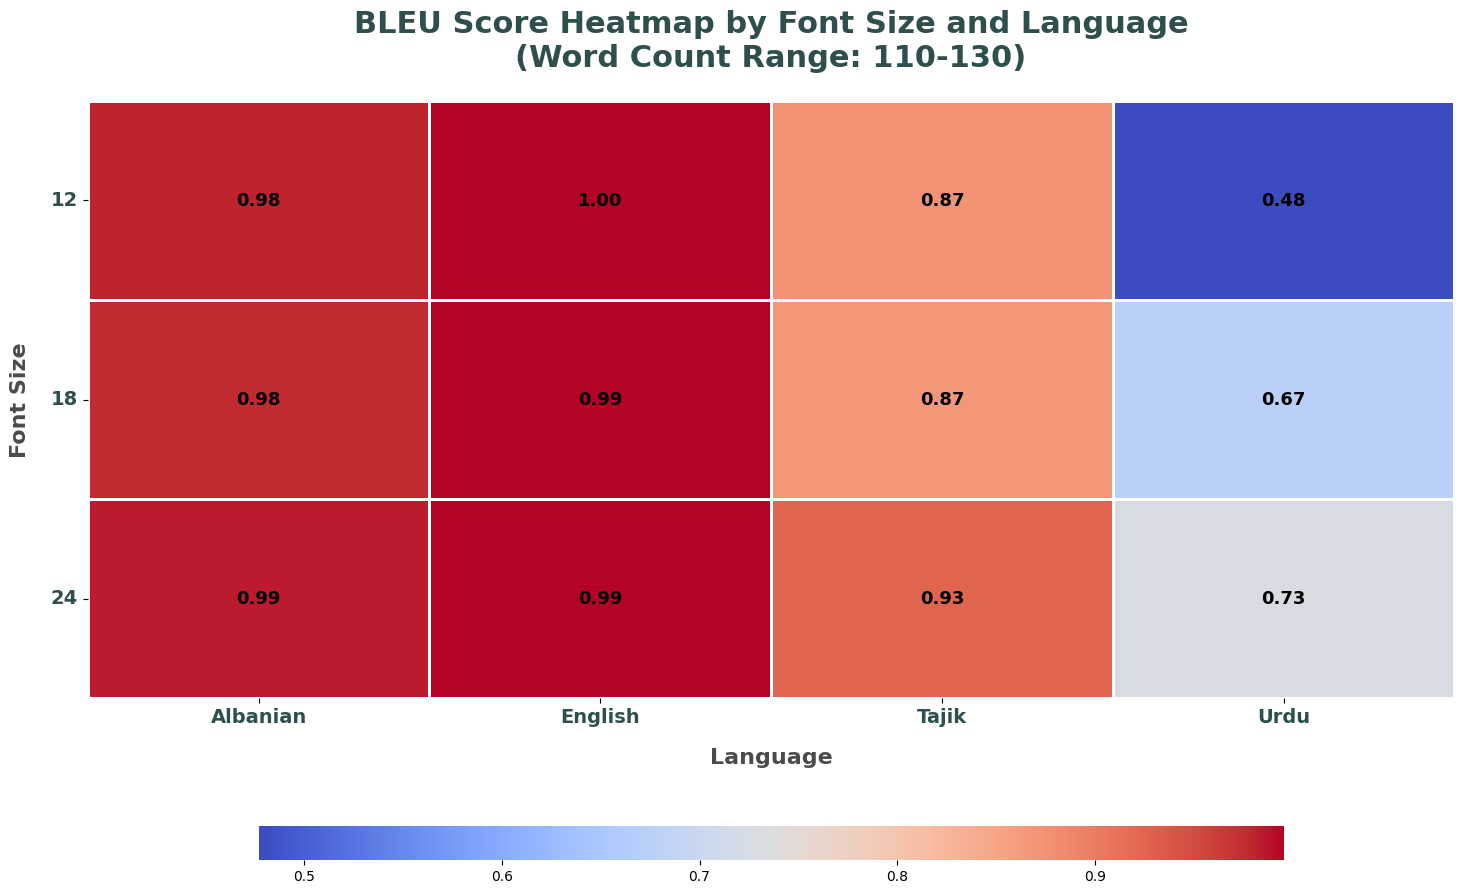

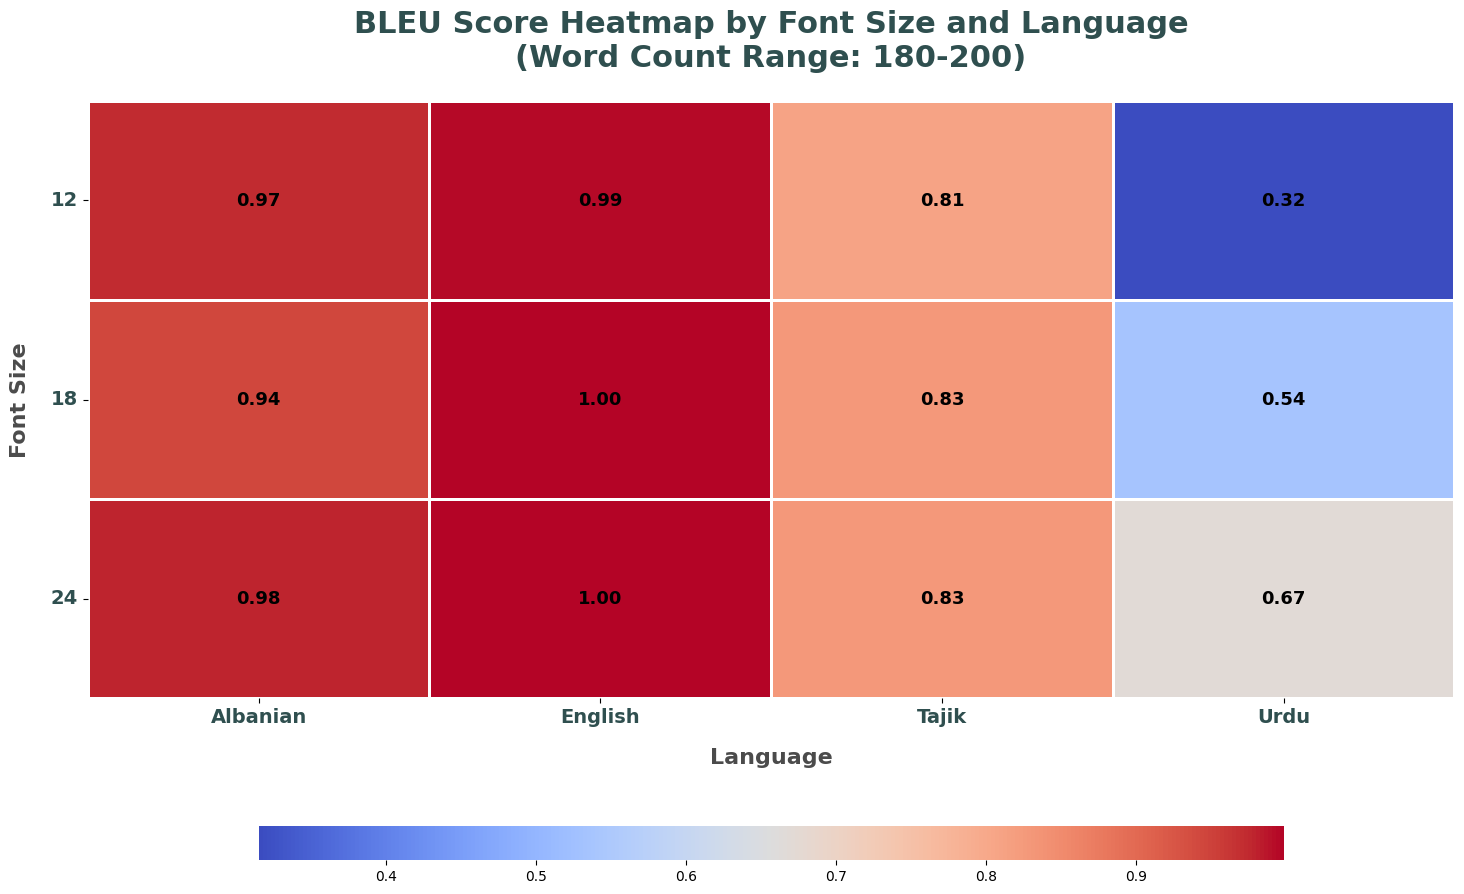

In [125]:
# Sleek Heatmaps for BLEU Scores by Font Size
def plot_heatmaps_bleu_font_size(df, word_count_order):
    for word_count in word_count_order:
        # Filter data for the current word count
        wc_bleu_combined_df = df[df['Word Count Range'] == word_count]

        # Create a pivot table for the heatmap
        heatmap_data_bleu = wc_bleu_combined_df.pivot_table(index='Font Size', columns='Language', values='BLEU')

        # Create the figure and plot heatmap
        plt.figure(figsize=(15, 10))  # Larger size for emphasis
        sns.heatmap(
            heatmap_data_bleu,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",  # Sleek, contrasting colormap
            annot_kws={"size": 13, "weight": "bold", "color": "black"},  # Styled annotations
            linewidths=2,  # Thicker cell dividers
            linecolor='white',  # White gridlines for a clean appearance
            cbar_kws={
                "orientation": "horizontal",  # Horizontal color bar for a modern look
                "shrink": 0.75,
                "aspect": 30,
                "pad": 0.15,  # Adjust spacing from the plot
                "ticks": None
            }
        )

        # Add a sleek title and labels
        plt.title(
            f'BLEU Score Heatmap by Font Size and Language\n(Word Count Range: {word_count})',
            fontsize=22,
            fontweight='bold',
            pad=25,
            color='#2f4f4f'  # Dark grayish-green for a modern feel
        )
        plt.xlabel('Language', fontsize=16, fontweight='bold', labelpad=15, color='#4b4b4b')
        plt.ylabel('Font Size', fontsize=16, fontweight='bold', labelpad=15, color='#4b4b4b')

        # Customize x and y ticks
        plt.xticks(fontsize=14, fontweight='bold', rotation=0, color='#2f4f4f')
        plt.yticks(fontsize=14, fontweight='bold', rotation=0, color='#2f4f4f')

        # Adjust layout for visual balance
        plt.tight_layout(pad=2.0)
        plt.show()

# Call the function for BLEU heatmaps
plot_heatmaps_bleu_font_size(bleu_combined_df, word_count_order)


## F1 Score

In [65]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Function to calculate precision, recall, and F1-score
def calculate_f1_scores(df):
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for _, row in df.iterrows():
        # Tokenize ground truth and response
        reference = str(row['Gold Label']).split()
        hypothesis = str(row['Response']).split()

        # Calculate matches and mismatches
        true_positives = len(set(reference) & set(hypothesis))  # Correctly recognized words
        false_positives = len(set(hypothesis) - set(reference))  # Extra words in hypothesis
        false_negatives = len(set(reference) - set(hypothesis))  # Missing words in hypothesis

        # Avoid division by zero
        precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
        recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

    # Add to DataFrame
    df['Precision'] = precision_scores
    df['Recall'] = recall_scores
    df['F1-Score'] = f1_scores
    return df


In [66]:
# Calculate F1-scores for each dataset
urdu_f1_df = calculate_f1_scores(filtered_urdu_df)
english_f1_df = calculate_f1_scores(filtered_english_df)
tajik_f1_df = calculate_f1_scores(filtered_tajik_df)
albanian_f1_df = calculate_f1_scores(filtered_albanian_df)


In [67]:
# Combine F1-score results for grouped analysis
f1_combined_results = []

def append_f1_results(df, word_count_order, language_name):
    for word_count in word_count_order:
        wc_df = df[df['Word Count Range'] == word_count]
        avg_f1 = wc_df.groupby('Font Size')['F1-Score'].mean().reset_index()
        avg_f1['Language'] = language_name
        avg_f1['Word Count Range'] = word_count
        f1_combined_results.append(avg_f1)

# Append F1 results for all languages
append_f1_results(urdu_f1_df, word_count_order, "Urdu")
append_f1_results(tajik_f1_df, word_count_order, "Tajik")
append_f1_results(albanian_f1_df, word_count_order, "Albanian")
append_f1_results(english_f1_df, word_count_order, "English")


# Combine into a single DataFrame
f1_combined_df = pd.concat(f1_combined_results, ignore_index=True)
print("Combined F1-score results DataFrame created.")


Combined F1-score results DataFrame created.


## F1 Score Grouped Bar Plots

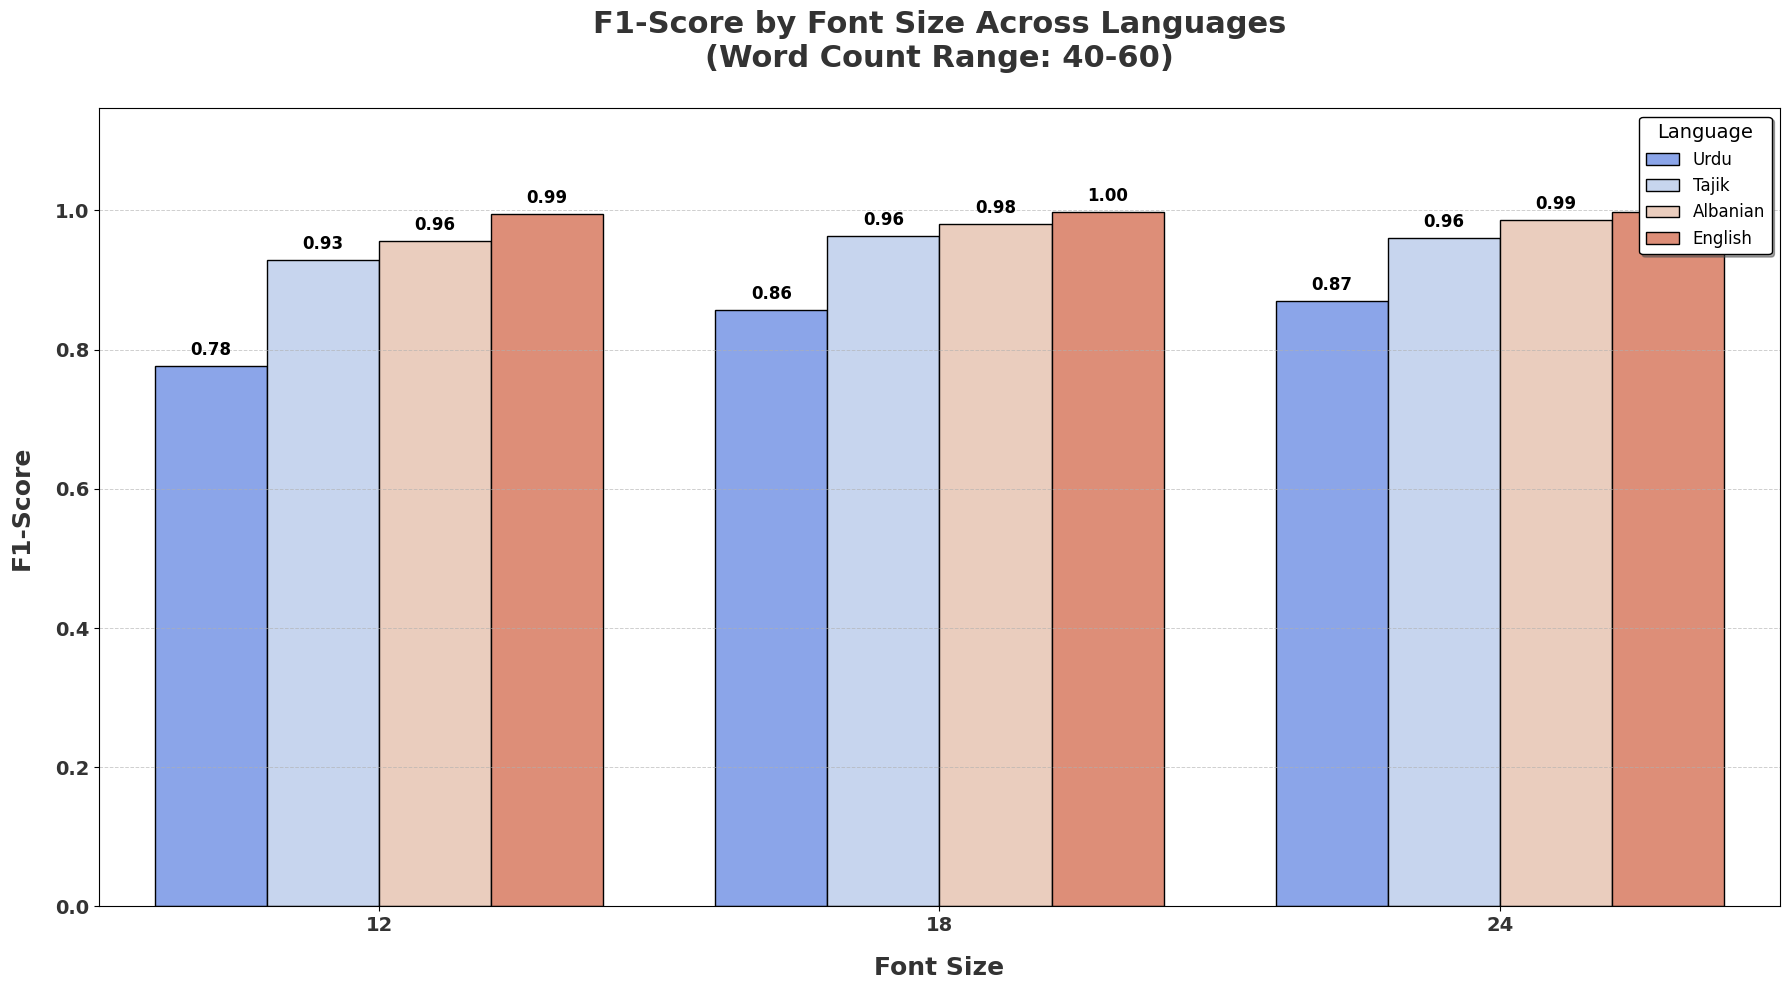

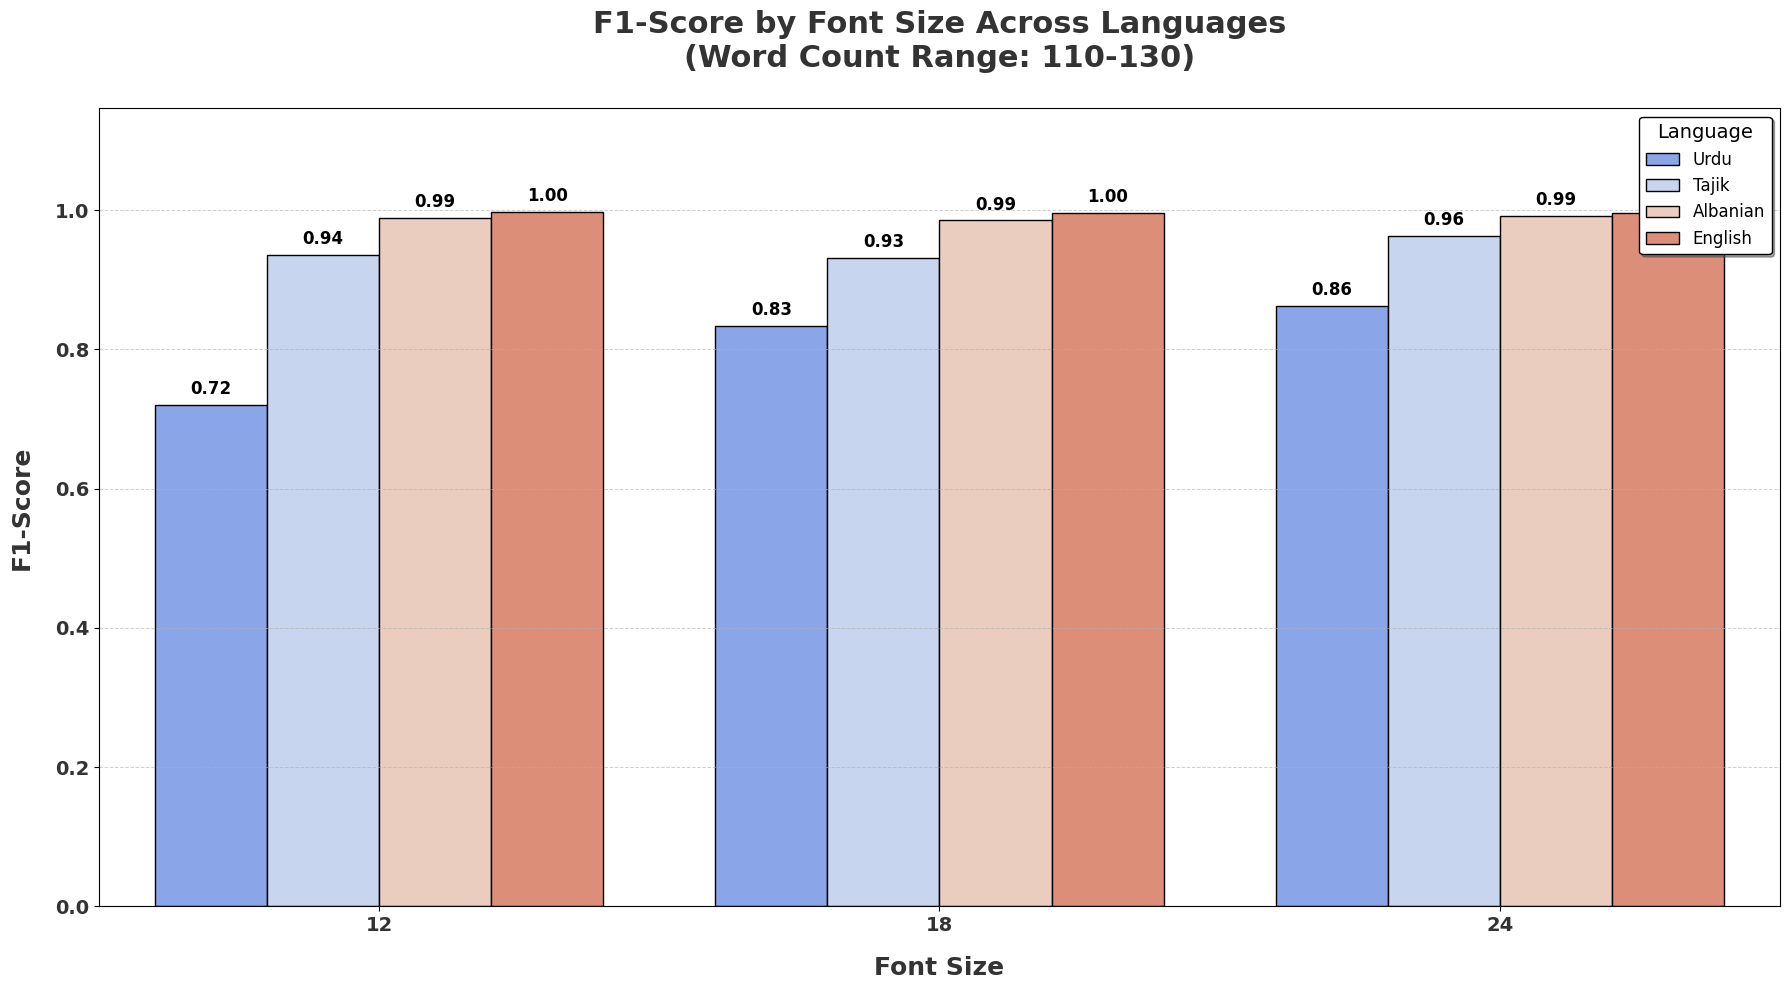

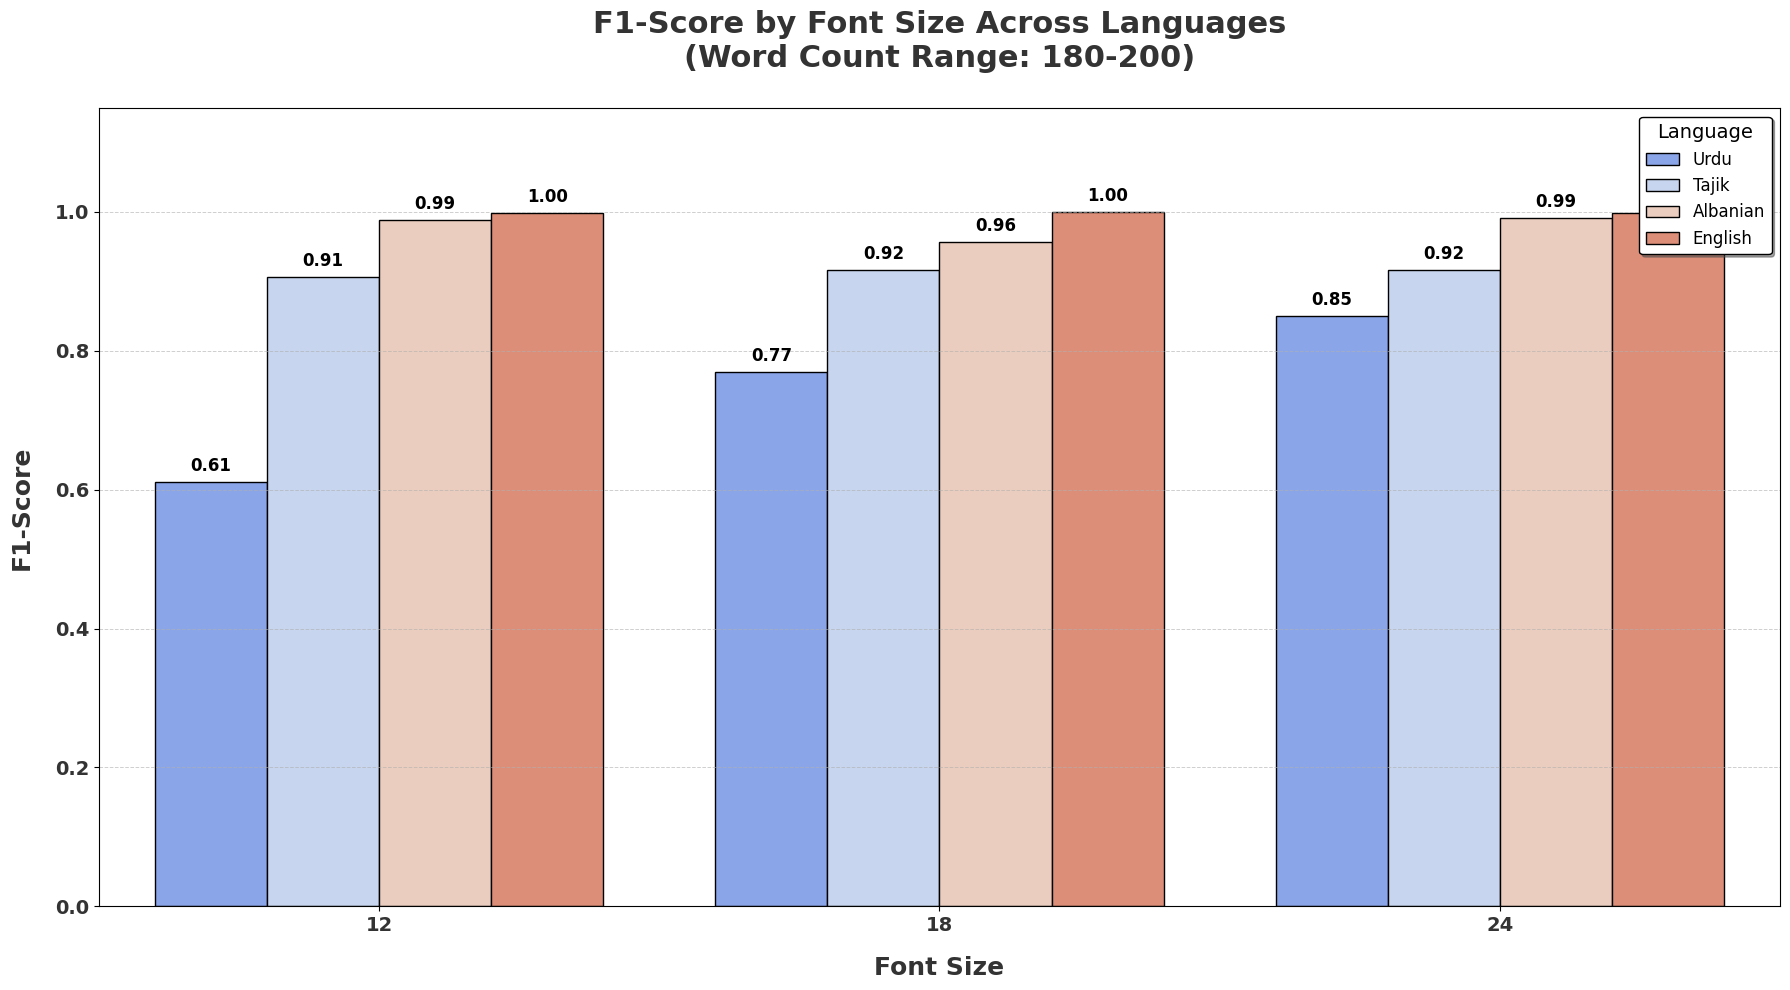

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

# Enhanced Grouped Bar Plot for F1-Scores
def plot_grouped_bar_f1(df, word_count_order):
    for word_count in word_count_order:
        plt.figure(figsize=(18, 10))  # Larger figure size for better presentation
        
        # Filter data for the specific word count range
        wc_f1_combined_df = df[df['Word Count Range'] == word_count]
        
        # Create the bar plot
        sns.barplot(
            data=wc_f1_combined_df,
            x='Font Size',
            y='F1-Score',
            hue='Language',
            ci=None,
            palette=sns.color_palette("coolwarm", len(wc_f1_combined_df['Language'].unique())),  # Warm to cool colors
            edgecolor='black'  # Black edges for sharp bar outlines
        )
        
        # Add annotations above each bar
        for bar in plt.gca().patches:
            bar_height = bar.get_height()  # Height of the bar (F1-Score)
            bar_width = bar.get_width()    # Width of the bar
            bar_x = bar.get_x()            # X-coordinate of the bar
            
            # Ensure annotations are added only for visible bars
            if bar_height > 0 and bar_width > 0:
                plt.text(
                    bar_x + bar_width / 2,  # Center of the bar
                    bar_height + 0.01,      # Slightly above the bar
                    f'{bar_height:.2f}',    # Format annotation
                    ha='center',
                    va='bottom',
                    fontsize=12,
                    fontweight='bold',
                    color='black'
                )
        
        # Customize the title and axis labels
        plt.title(
            f'F1-Score by Font Size Across Languages\n(Word Count Range: {word_count})',
            fontsize=22,
            fontweight='bold',
            pad=30,
            color='#333333'
        )
        plt.xlabel('Font Size', fontsize=18, labelpad=15, fontweight='bold', color='#333333')
        plt.ylabel('F1-Score', fontsize=18, labelpad=15, fontweight='bold', color='#333333')
        
        # Customize the legend
        plt.legend(
            title='Language',
            title_fontsize=14,
            fontsize=12,
            loc='upper right',
            frameon=True,
            facecolor='white',
            edgecolor='black',
            fancybox=True,  # Rounded corners
            shadow=True  # Add shadow for emphasis
        )
        
        # Add gridlines with a clean look
        plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)
        
        # Beautify x-axis and y-axis tick labels
        plt.xticks(fontsize=14, fontweight='bold', color='#333333')
        plt.yticks(fontsize=14, fontweight='bold', color='#333333')
        
        # Adjust y-axis limits to create visual balance
        plt.ylim(0, wc_f1_combined_df['F1-Score'].max() * 1.15)  # Add extra space above the bars
        
        # Use tight layout to ensure no clipping
        plt.tight_layout()
        
        # Show the plot
        plt.show()

# Call the function with the dataset and word count order
plot_grouped_bar_f1(f1_combined_df, word_count_order)


## F1 Score HeatMaps

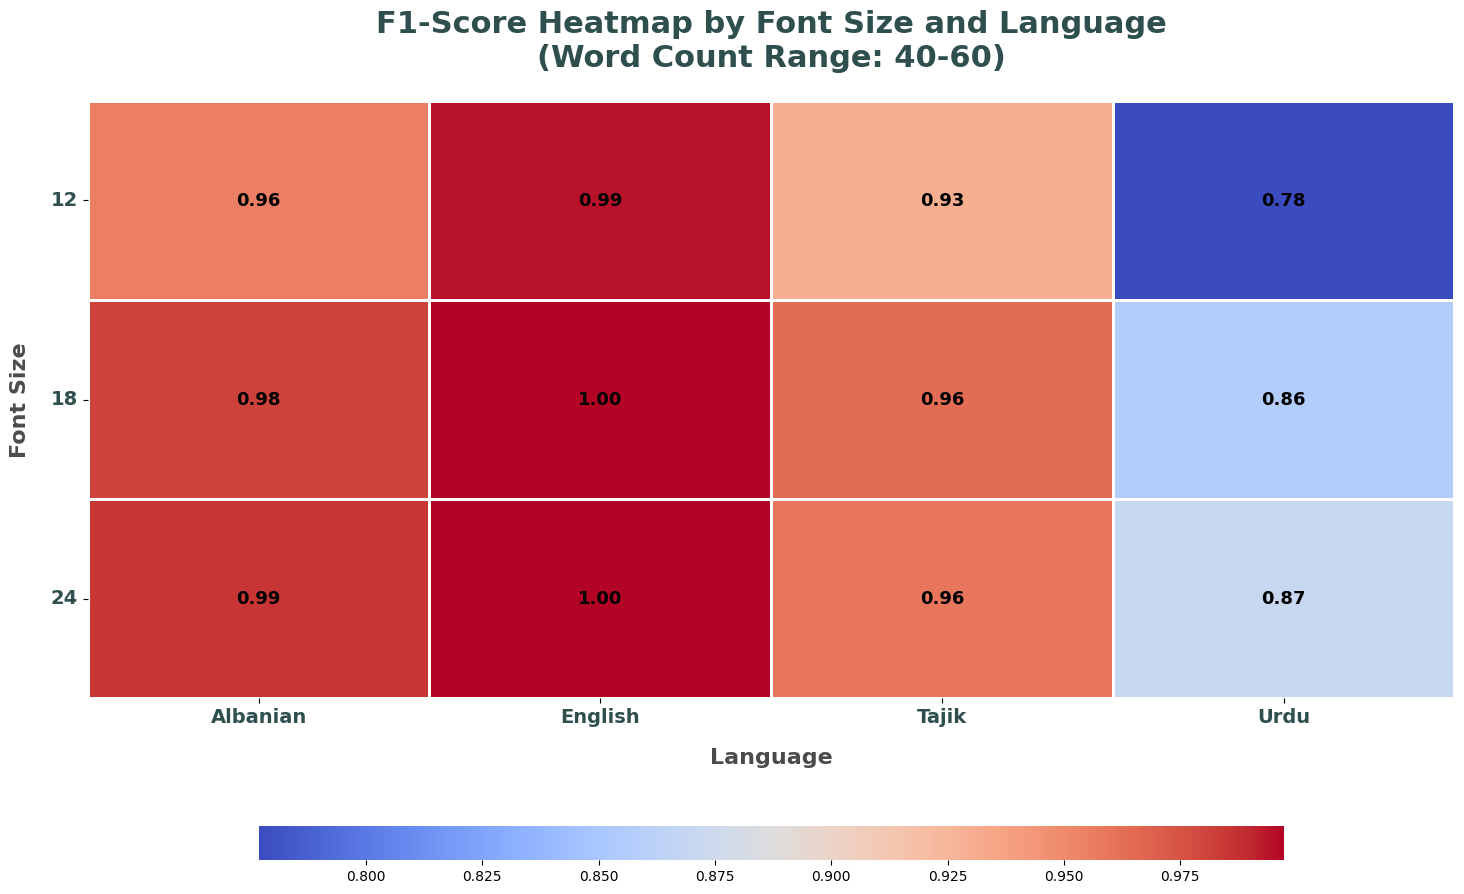

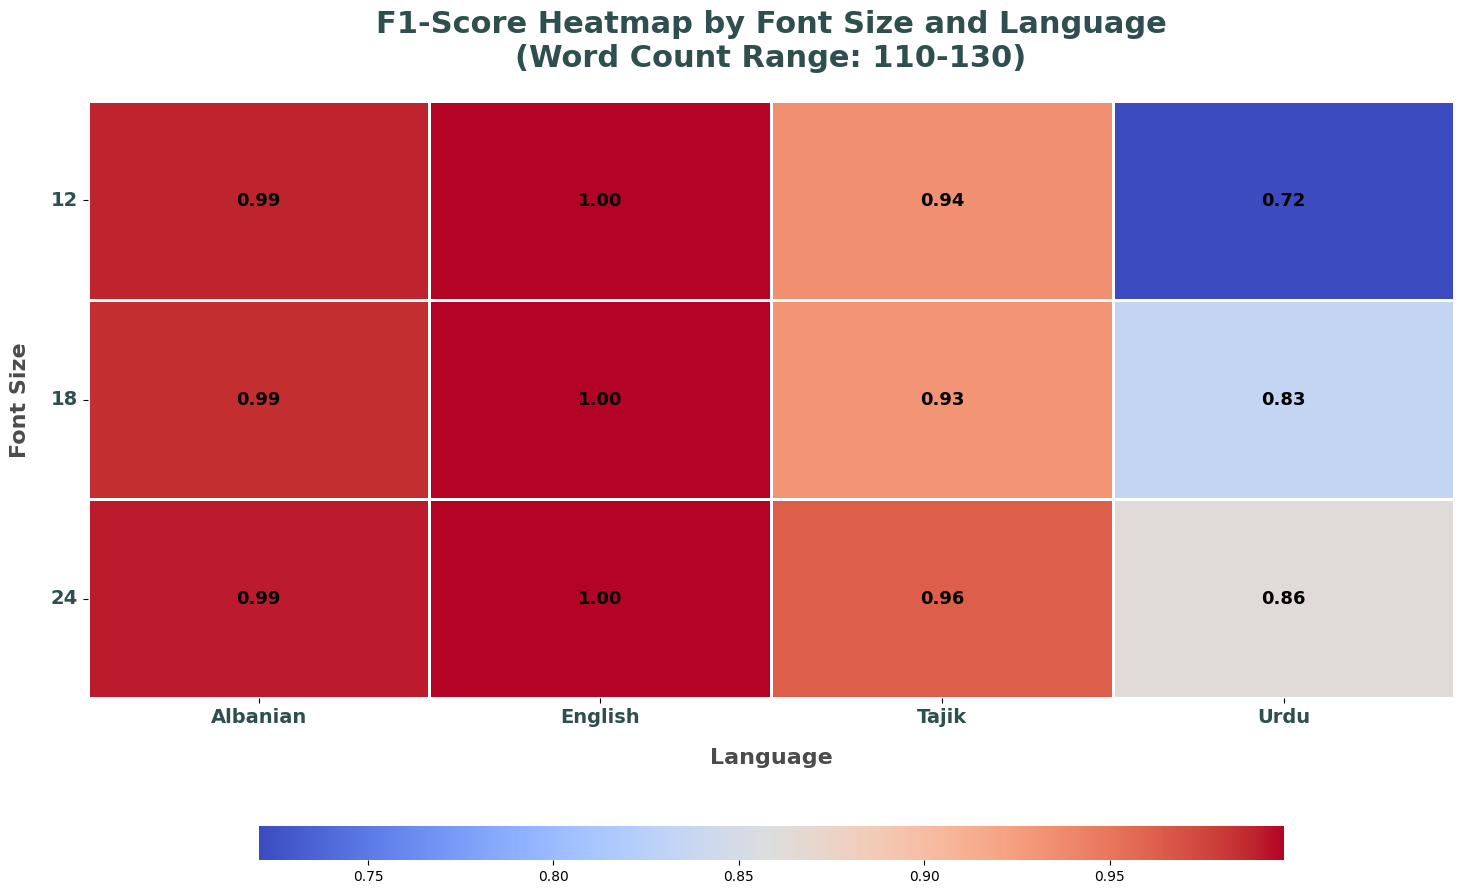

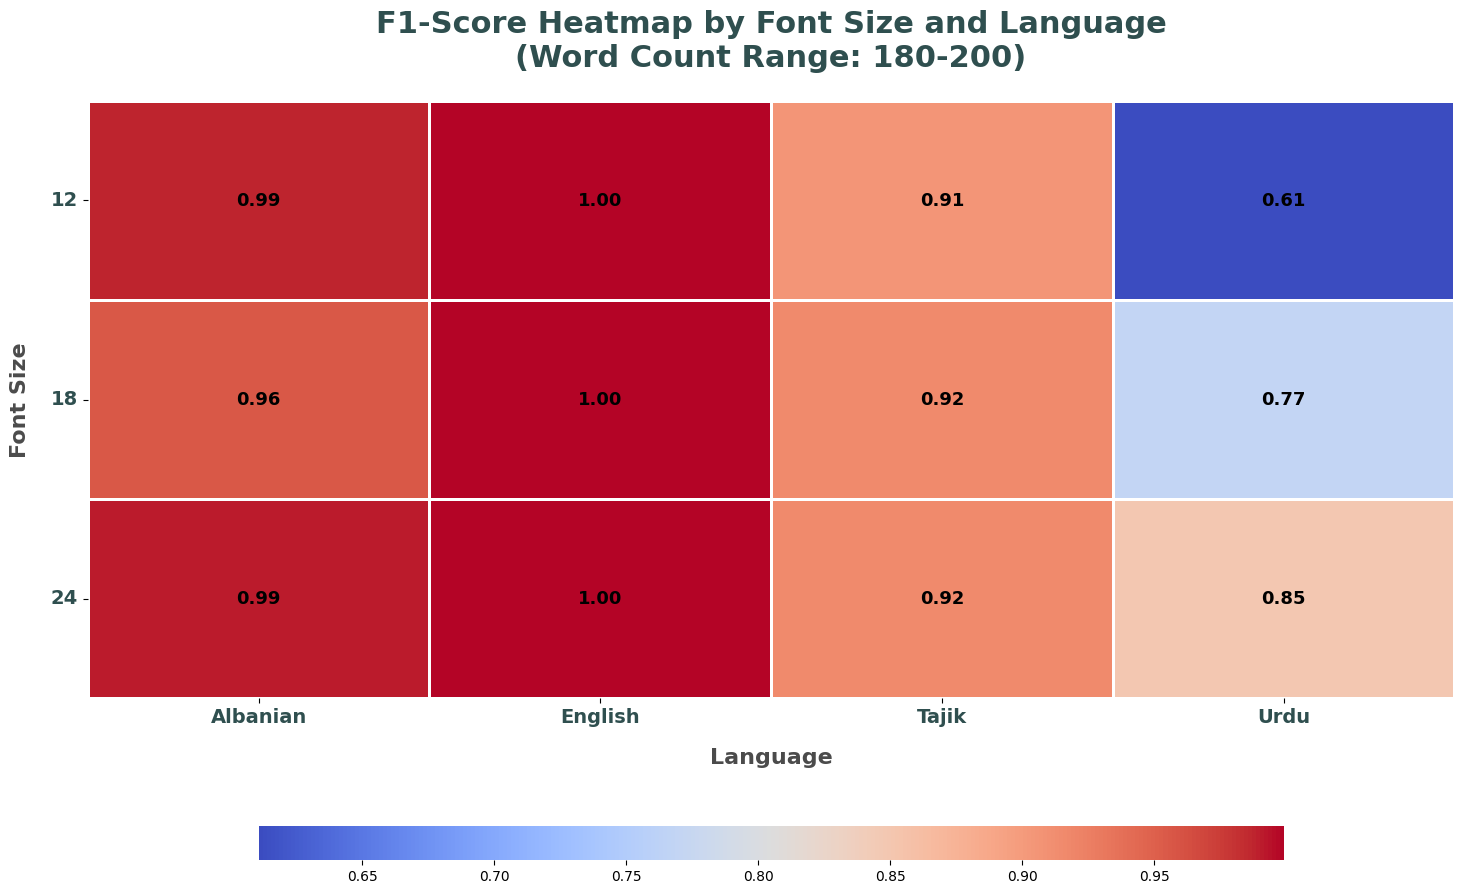

In [126]:
# Sleek Heatmaps for F1-Scores by Font Size
def plot_heatmaps_f1_font_size(df, word_count_order):
    for word_count in word_count_order:
        # Filter data for the current word count
        wc_f1_combined_df = df[df['Word Count Range'] == word_count]

        # Create a pivot table for the heatmap
        heatmap_data_f1 = wc_f1_combined_df.pivot_table(index='Font Size', columns='Language', values='F1-Score')

        # Create the figure and plot heatmap
        plt.figure(figsize=(15, 10))  # Larger size for emphasis
        sns.heatmap(
            heatmap_data_f1,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",  # Sleek, contrasting colormap
            annot_kws={"size": 13, "weight": "bold", "color": "black"},  # Styled annotations
            linewidths=2,  # Thicker cell dividers
            linecolor='white',  # White gridlines for a clean appearance
            cbar_kws={
                "orientation": "horizontal",  # Horizontal color bar for a modern look
                "shrink": 0.75,
                "aspect": 30,
                "pad": 0.15,  # Adjust spacing from the plot
                "ticks": None
            }
        )

        # Add a sleek title and labels
        plt.title(
            f'F1-Score Heatmap by Font Size and Language\n(Word Count Range: {word_count})',
            fontsize=22,
            fontweight='bold',
            pad=25,
            color='#2f4f4f'  # Dark grayish-green for a modern feel
        )
        plt.xlabel('Language', fontsize=16, fontweight='bold', labelpad=15, color='#4b4b4b')
        plt.ylabel('Font Size', fontsize=16, fontweight='bold', labelpad=15, color='#4b4b4b')

        # Customize x and y ticks
        plt.xticks(fontsize=14, fontweight='bold', rotation=0, color='#2f4f4f')
        plt.yticks(fontsize=14, fontweight='bold', rotation=0, color='#2f4f4f')

        # Adjust layout for visual balance
        plt.tight_layout(pad=2.0)
        plt.show()

# Call the function for F1-Score heatmaps
plot_heatmaps_f1_font_size(f1_combined_df, word_count_order)
